![Header](_src/money-gd9eca7990_640.jpg)
Imagen de <a href="https://pixabay.com/es/users/nattanan23-6312362/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2724235">Nattanan Kanchanaprat</a> en <a href="https://pixabay.com/es//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2724235">Pixabay</a>

# PRICE HOUSE PREDICTION

## Datathon - Proyecto Individual #2 Henry

### Author: Oscar Sánchez Díaz

https://www.linkedin.com/in/oscar-s%C3%A1nchez-d%C3%ADaz-72262590/


---

In [477]:
# Importando las librerías necesarias
import numpy as np
import pandas as pd

In [28]:
# Cargando el archivo `train.parquet` para entrenar y testear el modelo
train_full = pd.read_parquet('train.parquet')

# Cargando el dataset para predicción del target
prediction_full = pd.read_parquet('test.parquet')

# Exploratory Data Analysis (EDA)

In [29]:
# Revisamos el shape de nuestros dataframes
print(f'Shape for train dataframe: {train_full.shape}')
print(f'Shape for test dataframe: {prediction_full.shape}')

Shape for train dataframe: (346479, 22)
Shape for test dataframe: (38498, 21)


In [30]:
# Visualizamos los primeros 5 renglones del dataset de entrenamiento
train_full.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [31]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [32]:
train_full.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


## Revisamos si existen datos nulos

In [33]:
print(train_full.isna().sum())

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64


In [34]:
print(f'El porcentaje de datos faltantes para la columna `laundry_options` es de: {train_full["laundry_options"].isna().sum() / train_full.shape[0]}')

El porcentaje de datos faltantes para la columna `laundry_options` es de: 0.20541216062156725


In [ ]:
prediction_full.dropna()

In [386]:
prediction_full.shape

(38498, 21)

In [35]:
# laundry, parking, description, lat, long
# train_full['laundry_options'].unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', None,
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [36]:
# Revisando los valores nulos de la columna `laundry_options`
# laundry_none = train_full['laundry_options'].isna()
# train_full[laundry_none]['type'].value_counts()

apartment        60583
house             8302
condo              939
townhouse          826
duplex             247
manufactured       117
cottage/cabin       78
flat                33
loft                30
in-law              16
Name: type, dtype: int64

In [37]:
# train_full[laundry_none]['description']

13        Bedrooms: 2 Bathrooms: 2 Price: $870  Welcome ...
22        Tastefully designed apartment and townhomes wi...
23        Aura at Towne Place\t                        P...
27        Here's the ideal place to live, study, and enj...
28        BACK ON Marketplace. DELIGHTFUL 5 Sleeping roo...
                                ...                        
346437    Specials: Come find your new apartment home to...
346440    For the most impressive selection of floor pla...
346460    Come Home to Bell at Plantation Apartments in ...
346461    No fees for my apartment-locating services! Ca...
346465    Welcome to Park at Murano, where quality and c...
Name: description, Length: 71171, dtype: object

In [38]:
# Revisando los valores nulos de la columna `parking_options`
# parking_none = train_full['parking_options'].isna()
# train_full[parking_none]['type'].value_counts()

apartment        113419
house              8457
townhouse          2552
condo              1240
duplex              344
manufactured        321
cottage/cabin       179
loft                109
flat                 45
in-law               16
Name: type, dtype: int64

In [39]:
# train_full['parking_options'].unique()

array(['detached garage', 'carport', 'off-street parking', None,
       'attached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [40]:
train_full['lat'].unique()

array([43.5851, 38.9137, 36.7922, ..., 42.507 , 43.7198, 42.8997])

In [41]:
print(f'El porcentaje de datos faltantes para la columna `parking_options` es de: {train_full["parking_options"].isna().sum() / train_full.shape[0]}')

El porcentaje de datos faltantes para la columna `parking_options` es de: 0.36562677680321176


## 1er. Intento. Se procede a realizar un drop de todos los valores nulos.

In [649]:
train = train_full.dropna()

In [650]:
prediction = prediction_full.dropna()

In [465]:
# print(len(train['type'].value_counts()))
# print(len(prediction['type'].value_counts()))

12
10


In [467]:
# print(train['type'].value_counts())

apartment          150348
house               10809
townhouse            9640
duplex               3277
condo                3194
manufactured         3097
loft                  404
cottage/cabin         395
flat                  330
in-law                 85
land                    4
assisted living         1
Name: type, dtype: int64


In [466]:
# print(prediction['type'].value_counts())

apartment        18607
house             2238
townhouse         1328
condo              467
duplex             455
manufactured       376
cottage/cabin       63
loft                61
flat                54
in-law              17
Name: type, dtype: int64


In [488]:
# list(np.unique(train['type'].values))
# a = set(np.unique(train['type'].values))

In [489]:
# list(np.unique(prediction['type'].values))
# b = set(np.unique(prediction['type'].values))

In [490]:
# list(a - b)

['land', 'assisted living']

In [491]:
# list(np.unique(train['region'].values))
# c = set(np.unique(train['region'].values))

In [493]:
# list(np.unique(prediction['region'].values))
# d = set(np.unique(prediction['region'].values))

In [494]:
# list(c - d)

['salina',
 'north central FL',
 'the thumb',
 'southwest MS',
 'southwest TX',
 'fort smith, AR',
 'st louis',
 'western IL',
 'kansas city',
 'southwest VA']

In [495]:
# list(d - c)

['kenai peninsula', 'hawaii', 'fairbanks', 'anchorage / mat-su']

In [498]:
# list(np.unique(train['state'].values))
# e = set(np.unique(train['state'].values))
# list(np.unique(prediction['state'].values))
# f = set(np.unique(prediction['state'].values))

In [499]:
# list(e - f)

[]

In [500]:
# list(f - e)

['hi']

In [651]:
print(train.isna().sum())

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64


In [652]:
print(prediction.isna().sum())

id                         0
url                        0
region                     0
region_url                 0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64


In [653]:
# Creamos la columna `category price`
group_names = ['low', 'medium', 'high']
bins = [0, 999, 1999, train['price'].max()]
train['category_price'] = pd.cut(train['price'], bins=bins, labels=group_names, include_lowest=True)

/tmp/ipykernel_7064/4137707391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['category_price'] = pd.cut(train['price'], bins=bins, labels=group_names, include_lowest=True)


In [654]:
train[train['category_price'] == 'high']['price'].value_counts().sum()

19171

In [655]:
train['category_price'].value_counts()

medium    97626
low       95506
high      19171
Name: category_price, dtype: int64

In [656]:
train['category_price'].value_counts().sum()

212303

In [657]:
train['category_price'].unique()

['medium', 'low', 'high']
Categories (3, object): ['low' < 'medium' < 'high']

In [658]:
print(train[train['category_price'] == 'low']['price'].min())
print(train[train['category_price'] == 'low']['price'].max())
print(train[train['category_price'] == 'medium']['price'].min())
print(train[train['category_price'] == 'medium']['price'].max())
print(train[train['category_price'] == 'high']['price'].min())
print(train[train['category_price'] == 'high']['price'].max())

0
999
1000
1999
2000
2768307249


## Revisamos las distribuciones de nuestro dataframe

In [659]:
import plots.functions as fc

In [51]:
train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id,medium
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co,medium
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va,medium
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn,low
5,7047030967,https://dallas.craigslist.org/ndf/apa/d/lewisv...,dallas / fort worth,https://dallas.craigslist.org,1114,house,1649,3,2.0,1,...,0,0,w/d hookups,attached garage,https://images.craigslist.org/01212_1J89eIXG9R...,"Own this home with no deposits, fees, or money...",33.0198,-96.9925,tx,medium


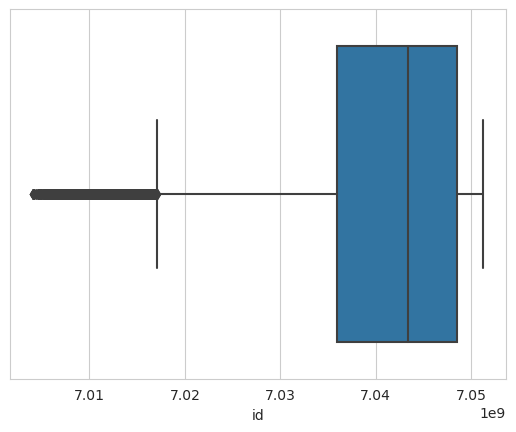

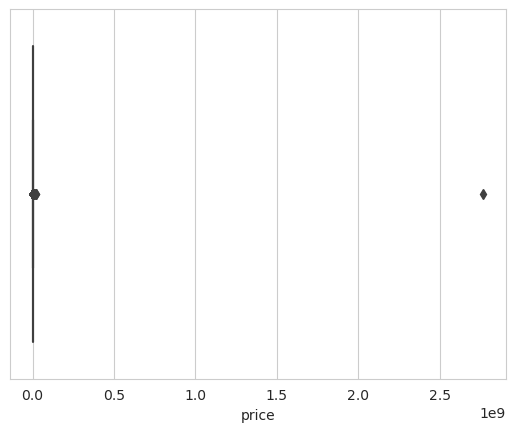

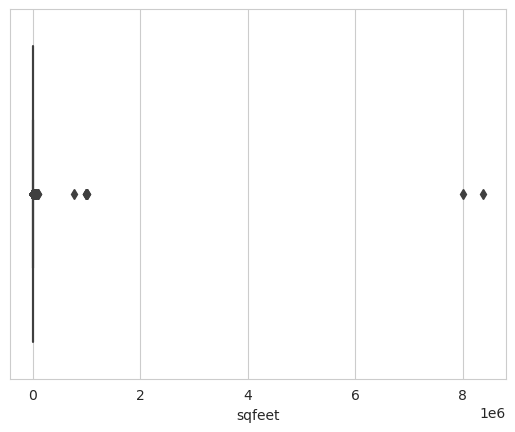

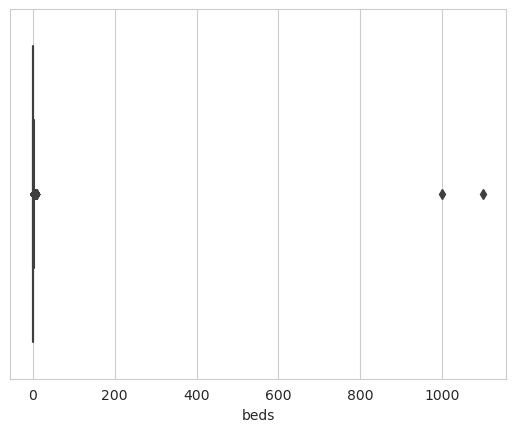

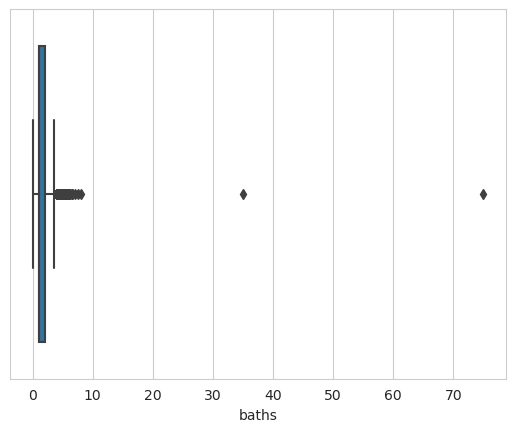

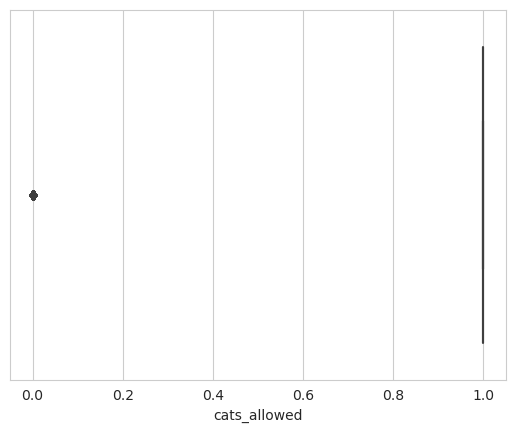

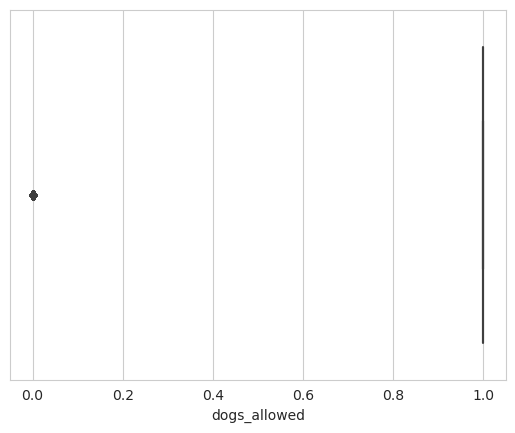

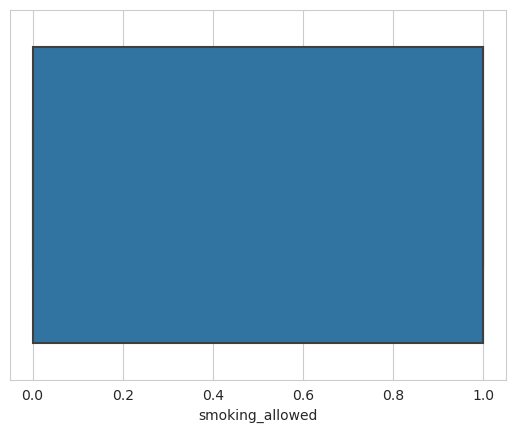

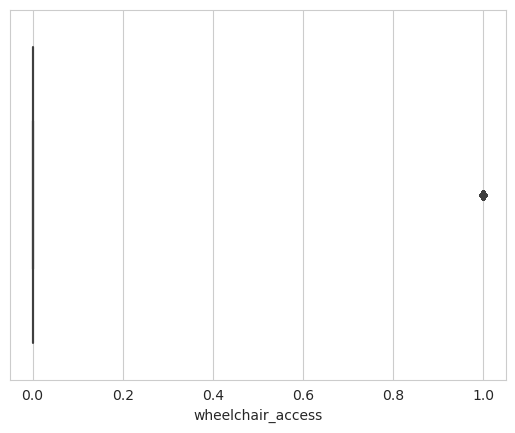

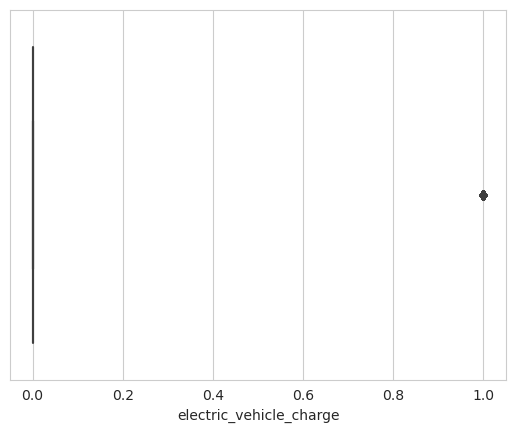

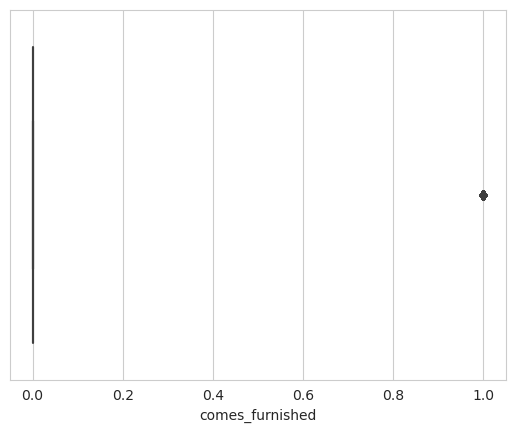

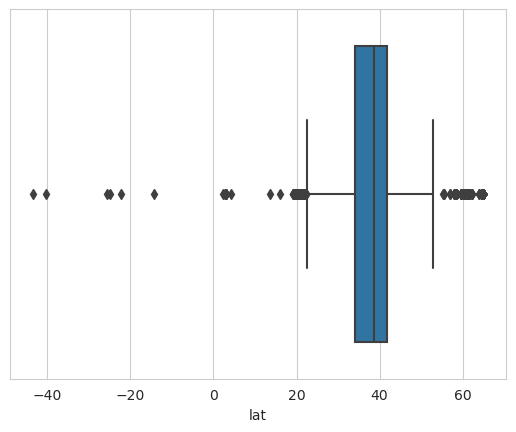

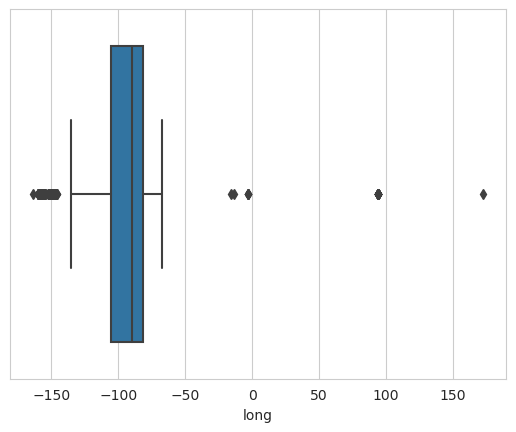

TypeError: Horizontal orientation requires numeric `x` variable.

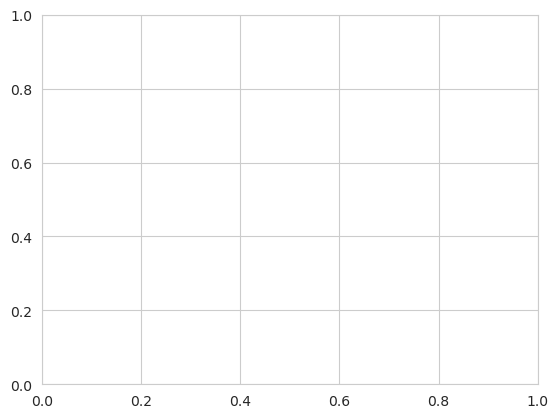

In [52]:
fc.plot_data_box(train)

In [53]:
# fc.plot_data_hist(train)

In [660]:
import seaborn as sns
import matplotlib.pyplot as plt

In [661]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212303 entries, 0 to 346478
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       212303 non-null  int64   
 1   url                      212303 non-null  object  
 2   region                   212303 non-null  object  
 3   region_url               212303 non-null  object  
 4   price                    212303 non-null  int64   
 5   type                     212303 non-null  object  
 6   sqfeet                   212303 non-null  int64   
 7   beds                     212303 non-null  int64   
 8   baths                    212303 non-null  float64 
 9   cats_allowed             212303 non-null  int64   
 10  dogs_allowed             212303 non-null  int64   
 11  smoking_allowed          212303 non-null  int64   
 12  wheelchair_access        212303 non-null  int64   
 13  electric_vehicle_charge  212303 non-null  in

In [ ]:
# sns.histplot(x=train['sqfeet'], data=train, kde=True)
# plt.show()

In [ ]:
# sns.histplot(x=train['beds'], data=train, kde=True)
# plt.show()

In [ ]:
# sns.histplot(x=train['baths'], data=train, kde=True)
# plt.show()

In [663]:
columns_to_drop = ['id' ,'url', 'region', 'region_url', 'type', 'image_url', 'description', 'state']
train.drop(columns=columns_to_drop, inplace=True)

/tmp/ipykernel_7064/2526099440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=columns_to_drop, inplace=True)


In [730]:
prediction.drop(columns=columns_to_drop, inplace=True)

KeyError: "['url', 'region', 'region_url', 'type', 'image_url', 'description', 'state'] not found in axis"

## Utilizaremos la técnica del Rango Intercuartílico para eliminar outliers.

### Para la columna `price`

In [665]:
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `price`: {Q1}')
print(f'Q3 de la columna `price`: {Q3}')
print(f'El IQR de la columna `price` es: {IQR}')
print(f'Bigote inferior de la columna` price` es: {BI}')
print(f'Bigote superior de la columna `price` es: {BS}')

Q1 de la columna `price`: 819.0
Q3 de la columna `price`: 1464.0
El IQR de la columna `price` es: 645.0
Bigote inferior de la columna` price` es: -148.5
Bigote superior de la columna `price` es: 2431.5


In [666]:
# Delete rows Price's with price value == 0
indexPrice = train[train['price'] == 0].index

In [667]:
train.drop(indexPrice, inplace=True)

/tmp/ipykernel_7064/3977536249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(indexPrice, inplace=True)


In [668]:
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `price`: {Q1}')
print(f'Q3 de la columna `price`: {Q3}')
print(f'El IQR de la columna `price` es: {IQR}')
print(f'Bigote inferior de la columna` price` es: {BI}')
print(f'Bigote superior de la columna `price` es: {BS}')

Q1 de la columna `price`: 820.0
Q3 de la columna `price`: 1467.0
El IQR de la columna `price` es: 647.0
Bigote inferior de la columna` price` es: -150.5
Bigote superior de la columna `price` es: 2437.5


In [669]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `precio`: {train[(train["price"] < BI) | (train["price"] > BS)].shape[0]}')

Cantidad de registros totales: 211493
Cantidad de outliers en la columna `precio`: 9957


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello recurrimos a la siguiente línea de código:

In [670]:
out_price = (train['price'] < BI) | (train['price'] > BS)
train = train[~out_price]

In [671]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `precio`: {train[(train["price"] < BI) | (train["price"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna price: {train.shape[0]}')

Cantidad de registros totales: 201536
Cantidad de outliers en la columna `precio`: 0
Tamaño del dataset, luego de eliminar outliers en la columna price: 201536


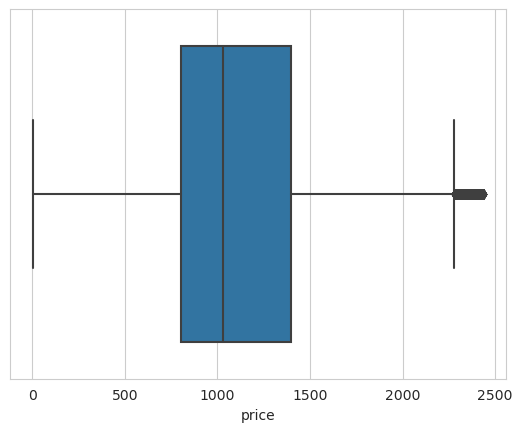

In [672]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='price', data=train)
plt.show()

### Para la columna `sqfeet`


In [673]:
Q1 = train['sqfeet'].quantile(0.25)
Q3 = train['sqfeet'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `sqfeet`: {Q1}')
print(f'Q3 de la columna `sqfeet`: {Q3}')
print(f'El IQR de la columna `sqfeet` es: {IQR}')
print(f'Bigote inferior de la columna` sqfeet` es: {BI}')
print(f'Bigote superior de la columna `sqfeet` es: {BS}')

Q1 de la columna `sqfeet`: 750.0
Q3 de la columna `sqfeet`: 1135.0
El IQR de la columna `sqfeet` es: 385.0
Bigote inferior de la columna` sqfeet` es: 172.5
Bigote superior de la columna `sqfeet` es: 1712.5


In [674]:
# Delete rows Price's with sqfeet value == 0
indexSqfeet = train[train['sqfeet'] == 0].index

In [675]:
train.drop(indexSqfeet, inplace=True)

In [676]:
Q1 = train['sqfeet'].quantile(0.25)
Q3 = train['sqfeet'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `sqfeet`: {Q1}')
print(f'Q3 de la columna `sqfeet`: {Q3}')
print(f'El IQR de la columna `sqfeet` es: {IQR}')
print(f'Bigote inferior de la columna` sqfeet` es: {BI}')
print(f'Bigote superior de la columna `sqfeet` es: {BS}')

Q1 de la columna `sqfeet`: 750.0
Q3 de la columna `sqfeet`: 1135.0
El IQR de la columna `sqfeet` es: 385.0
Bigote inferior de la columna` sqfeet` es: 172.5
Bigote superior de la columna `sqfeet` es: 1712.5


In [677]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `sqfeet`: {train[(train["sqfeet"] < BI) | (train["sqfeet"] > BS)].shape[0]}')

Cantidad de registros totales: 201504
Cantidad de outliers en la columna `sqfeet`: 8438


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello recurrimos a la siguiente línea de código:

In [678]:
out_sqfeet = (train['sqfeet'] < BI) | (train['sqfeet'] > BS)
train = train[~out_sqfeet]

In [679]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `sqfeet`: {train[(train["sqfeet"] < BI) | (train["sqfeet"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna sqfeet: {train.shape[0]}')

Cantidad de registros totales: 193066
Cantidad de outliers en la columna `sqfeet`: 0
Tamaño del dataset, luego de eliminar outliers en la columna sqfeet: 193066


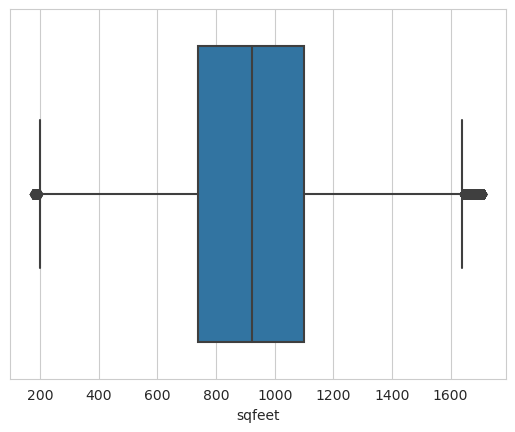

In [680]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='sqfeet', data=train)
plt.show()

### Para la columna `beds`

In [681]:
Q1 = train['beds'].quantile(0.25)
Q3 = train['beds'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `beds`: {Q1}')
print(f'Q3 de la columna `beds`: {Q3}')
print(f'El IQR de la columna `beds` es: {IQR}')
print(f'Bigote inferior de la columna` beds` es: {BI}')
print(f'Bigote superior de la columna `beds` es: {BS}')

Q1 de la columna `beds`: 1.0
Q3 de la columna `beds`: 2.0
El IQR de la columna `beds` es: 1.0
Bigote inferior de la columna` beds` es: -0.5
Bigote superior de la columna `beds` es: 3.5


In [682]:
# Delete rows Price's with beds value == 0
indexBeds = train[train['beds'] == 0].index

In [683]:
train.drop(indexBeds, inplace=True)

In [684]:
Q1 = train['beds'].quantile(0.25)
Q3 = train['beds'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `beds`: {Q1}')
print(f'Q3 de la columna `beds`: {Q3}')
print(f'El IQR de la columna `beds` es: {IQR}')
print(f'Bigote inferior de la columna` beds` es: {BI}')
print(f'Bigote superior de la columna `beds` es: {BS}')

Q1 de la columna `beds`: 1.0
Q3 de la columna `beds`: 2.0
El IQR de la columna `beds` es: 1.0
Bigote inferior de la columna` beds` es: -0.5
Bigote superior de la columna `beds` es: 3.5


In [685]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `beds`: {train[(train["beds"] < BI) | (train["beds"] > BS)].shape[0]}')

Cantidad de registros totales: 187003
Cantidad de outliers en la columna `beds`: 3258


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello recurrimos a la siguiente línea de código:

In [686]:
out_beds = (train['beds'] < BI) | (train['beds'] > BS)
train = train[~out_beds]

In [687]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `beds`: {train[(train["beds"] < BI) | (train["beds"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna beds: {train.shape[0]}')

Cantidad de registros totales: 183745
Cantidad de outliers en la columna `beds`: 0
Tamaño del dataset, luego de eliminar outliers en la columna beds: 183745


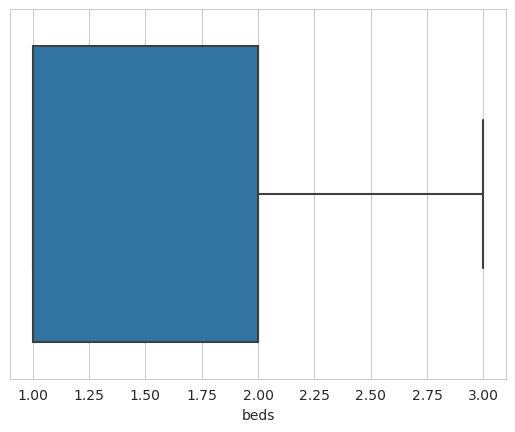

In [688]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='beds', data=train)
plt.show()

### Para la columna `baths`

In [689]:
Q1 = train['baths'].quantile(0.25)
Q3 = train['baths'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `baths`: {Q1}')
print(f'Q3 de la columna `baths`: {Q3}')
print(f'El IQR de la columna `baths` es: {IQR}')
print(f'Bigote inferior de la columna` baths` es: {BI}')
print(f'Bigote superior de la columna `baths` es: {BS}')

Q1 de la columna `baths`: 1.0
Q3 de la columna `baths`: 2.0
El IQR de la columna `baths` es: 1.0
Bigote inferior de la columna` baths` es: -0.5
Bigote superior de la columna `baths` es: 3.5


In [690]:
# Delete rows Price's with beds value == 0
indexBeds = train[train['beds'] == 0].index

In [691]:
train.drop(indexBeds, inplace=True)

In [692]:
Q1 = train['beds'].quantile(0.25)
Q3 = train['beds'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `beds`: {Q1}')
print(f'Q3 de la columna `beds`: {Q3}')
print(f'El IQR de la columna `beds` es: {IQR}')
print(f'Bigote inferior de la columna` beds` es: {BI}')
print(f'Bigote superior de la columna `beds` es: {BS}')

Q1 de la columna `beds`: 1.0
Q3 de la columna `beds`: 2.0
El IQR de la columna `beds` es: 1.0
Bigote inferior de la columna` beds` es: -0.5
Bigote superior de la columna `beds` es: 3.5


In [693]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `baths`: {train[(train["baths"] < BI) | (train["baths"] > BS)].shape[0]}')

Cantidad de registros totales: 183745
Cantidad de outliers en la columna `baths`: 28


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello recurrimos a la siguiente línea de código:

In [694]:
out_baths = (train['baths'] < BI) | (train['baths'] > BS)
train = train[~out_baths]

In [695]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `baths`: {train[(train["baths"] < BI) | (train["baths"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna baths: {train.shape[0]}')

Cantidad de registros totales: 183717
Cantidad de outliers en la columna `baths`: 0
Tamaño del dataset, luego de eliminar outliers en la columna baths: 183717


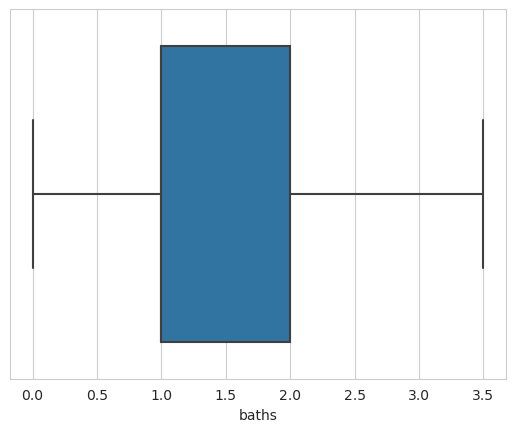

In [696]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='baths', data=train)
plt.show()

Lat and long
Revisando las latitudes y longitudes de nuestro dataset

In [697]:
train['lat'].describe()

count    183717.000000
mean         37.902486
std           5.574423
min         -40.266600
25%          33.951900
50%          38.590100
75%          41.719400
max          64.993700
Name: lat, dtype: float64

In [698]:
train['long'].describe()

count    183717.000000
mean        -93.602109
std          16.390215
min        -163.894000
25%        -102.349000
50%         -88.950300
75%         -81.586400
max          94.124800
Name: long, dtype: float64

In [699]:
import geopandas as gpd
from shapely.geometry import Point

In [700]:
geometry = [Point(xy) for xy in zip(train['long'], train['lat'])]
geometry[:3]

[<POINT (-116.225 43.585)>, <POINT (-104.78 38.914)>, <POINT (-76.164 36.792)>]

In [701]:
geo_df = gpd.GeoDataFrame(train, crs = {'init': 'epsg:4326'}, geometry=geometry)

/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [702]:
geo_df.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,category_price,geometry
0,1350,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,medium,POINT (-116.22500 43.58510)
1,1115,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,medium,POINT (-104.78000 38.91370)
2,1129,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,medium,POINT (-76.16430 36.79220)
4,995,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,low,POINT (-86.65920 36.05950)
5,1114,1649,3,2.0,1,1,1,0,0,0,w/d hookups,attached garage,33.0198,-96.9925,medium,POINT (-96.99250 33.01980)


<AxesSubplot:>

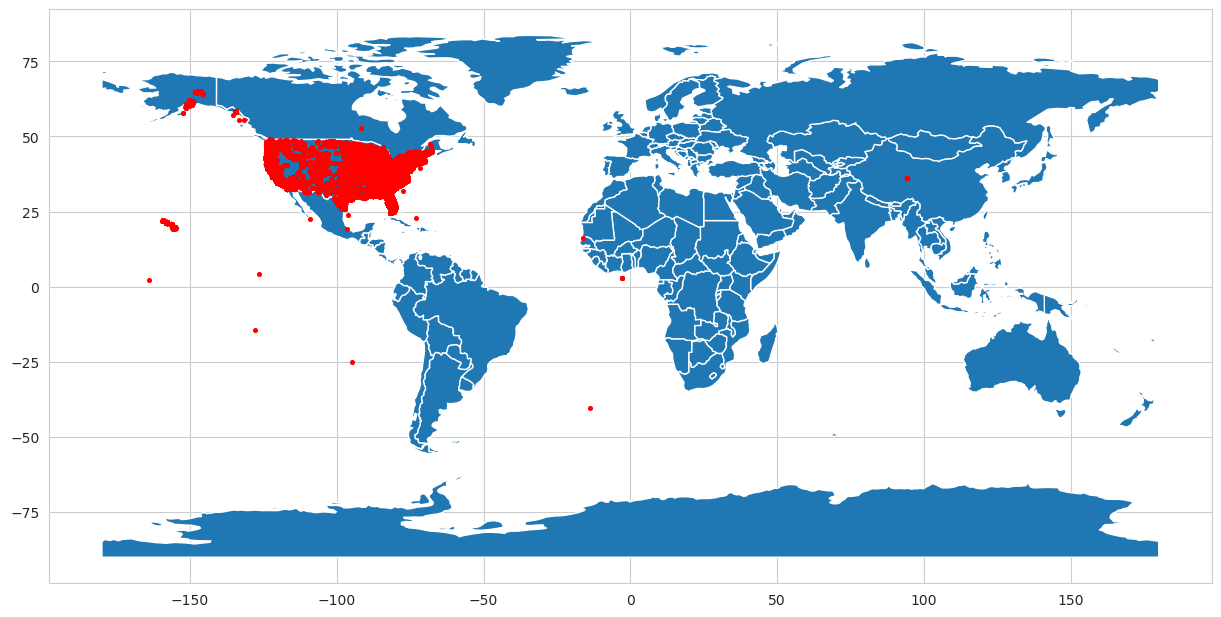

In [703]:
# geo_df.plot(column='geometry')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df.plot(ax=world.plot(figsize=(15, 9)), marker='o', color='red', markersize=7)

### Para la columna `lat`

In [704]:
Q1 = train['lat'].quantile(0.25)
Q3 = train['lat'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `lat`: {Q1}')
print(f'Q3 de la columna `lat`: {Q3}')
print(f'El IQR de la columna `lat` es: {IQR}')
print(f'Bigote inferior de la columna` lat` es: {BI}')
print(f'Bigote superior de la columna `lat` es: {BS}')

Q1 de la columna `lat`: 33.9519
Q3 de la columna `lat`: 41.7194
El IQR de la columna `lat` es: 7.767499999999998
Bigote inferior de la columna` lat` es: 22.300650000000005
Bigote superior de la columna `lat` es: 53.37065


In [705]:
# Delete rows Price's with beds value == 0
indexLat = train[train['lat'] == 0].index
train.drop(indexLat, inplace=True)

In [706]:
Q1 = train['lat'].quantile(0.25)
Q3 = train['lat'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `lat`: {Q1}')
print(f'Q3 de la columna `lat`: {Q3}')
print(f'El IQR de la columna `lat` es: {IQR}')
print(f'Bigote inferior de la columna` lat` es: {BI}')
print(f'Bigote superior de la columna `lat` es: {BS}')

Q1 de la columna `lat`: 33.9519
Q3 de la columna `lat`: 41.7194
El IQR de la columna `lat` es: 7.767499999999998
Bigote inferior de la columna` lat` es: 22.300650000000005
Bigote superior de la columna `lat` es: 53.37065


In [707]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `lat`: {train[(train["lat"] < BI) | (train["lat"] > BS)].shape[0]}')

Cantidad de registros totales: 183717
Cantidad de outliers en la columna `lat`: 2098


In [708]:
out_lat = (train['lat'] < BI) | (train['lat'] > BS)

In [709]:
train = train[~out_lat]

In [710]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `lat`: {train[(train["lat"] < BI) | (train["lat"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna lat: {train.shape[0]}')

Cantidad de registros totales: 181619
Cantidad de outliers en la columna `lat`: 0
Tamaño del dataset, luego de eliminar outliers en la columna lat: 181619


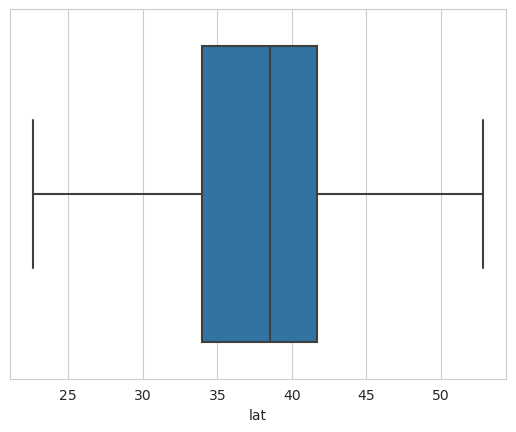

In [711]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='lat', data=train)
plt.show()

### Para la columna `long`

In [712]:
Q1 = train['long'].quantile(0.25)
Q3 = train['long'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `long`: {Q1}')
print(f'Q3 de la columna `long`: {Q3}')
print(f'El IQR de la columna `long` es: {IQR}')
print(f'Bigote inferior de la columna` long` es: {BI}')
print(f'Bigote superior de la columna `long` es: {BS}')

Q1 de la columna `long`: -101.9325
Q3 de la columna `long`: -81.5486
El IQR de la columna `long` es: 20.38390000000001
Bigote inferior de la columna` long` es: -132.50835
Bigote superior de la columna `long` es: -50.97274999999998


In [713]:
# Delete rows Price's with beds value == 0
indexLong = train[train['long'] == 0].index
train.drop(indexLong, inplace=True)

In [714]:
Q1 = train['long'].quantile(0.25)
Q3 = train['long'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR

print(f'Q1 de la columna `long`: {Q1}')
print(f'Q3 de la columna `long`: {Q3}')
print(f'El IQR de la columna `long` es: {IQR}')
print(f'Bigote inferior de la columna` long` es: {BI}')
print(f'Bigote superior de la columna `long` es: {BS}')

Q1 de la columna `long`: -101.9325
Q3 de la columna `long`: -81.5486
El IQR de la columna `long` es: 20.38390000000001
Bigote inferior de la columna` long` es: -132.50835
Bigote superior de la columna `long` es: -50.97274999999998


In [715]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `long`: {train[(train["long"] < BI) | (train["long"] > BS)].shape[0]}')

Cantidad de registros totales: 181619
Cantidad de outliers en la columna `long`: 35


In [716]:
out_long = (train['long'] < BI) | (train['long'] > BS)

In [717]:
train = train[~out_long]

In [718]:
print(f'Cantidad de registros totales: {train.shape[0]}')
print(f'Cantidad de outliers en la columna `long`: {train[(train["long"] < BI) | (train["long"] > BS)].shape[0]}')
print(f'Tamaño del dataset, luego de eliminar outliers en la columna long: {train.shape[0]}')

Cantidad de registros totales: 181584
Cantidad de outliers en la columna `long`: 0
Tamaño del dataset, luego de eliminar outliers en la columna long: 181584


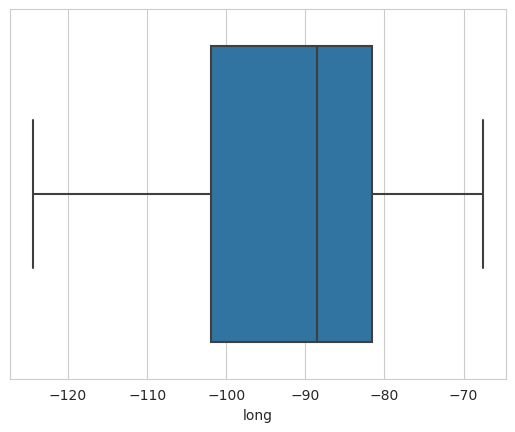

In [719]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente
sns.boxplot(x='long', data=train)
plt.show()

# Graficamos con Geopandas para verificar la correcta eliminación de los outliers en las columnas `lat` y `long`

In [720]:
geometry = [Point(xy) for xy in zip(train['long'], train['lat'])]
geometry[:3]

[<POINT (-116.225 43.585)>, <POINT (-104.78 38.914)>, <POINT (-76.164 36.792)>]

In [721]:
geo_df = gpd.GeoDataFrame(train, crs={'init': 'epsg:4326'}, geometry=geometry)

/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [722]:
geo_df.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,category_price,geometry
0,1350,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,medium,POINT (-116.22500 43.58510)
1,1115,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,medium,POINT (-104.78000 38.91370)
2,1129,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,medium,POINT (-76.16430 36.79220)
4,995,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,low,POINT (-86.65920 36.05950)
5,1114,1649,3,2.0,1,1,1,0,0,0,w/d hookups,attached garage,33.0198,-96.9925,medium,POINT (-96.99250 33.01980)


<AxesSubplot:>

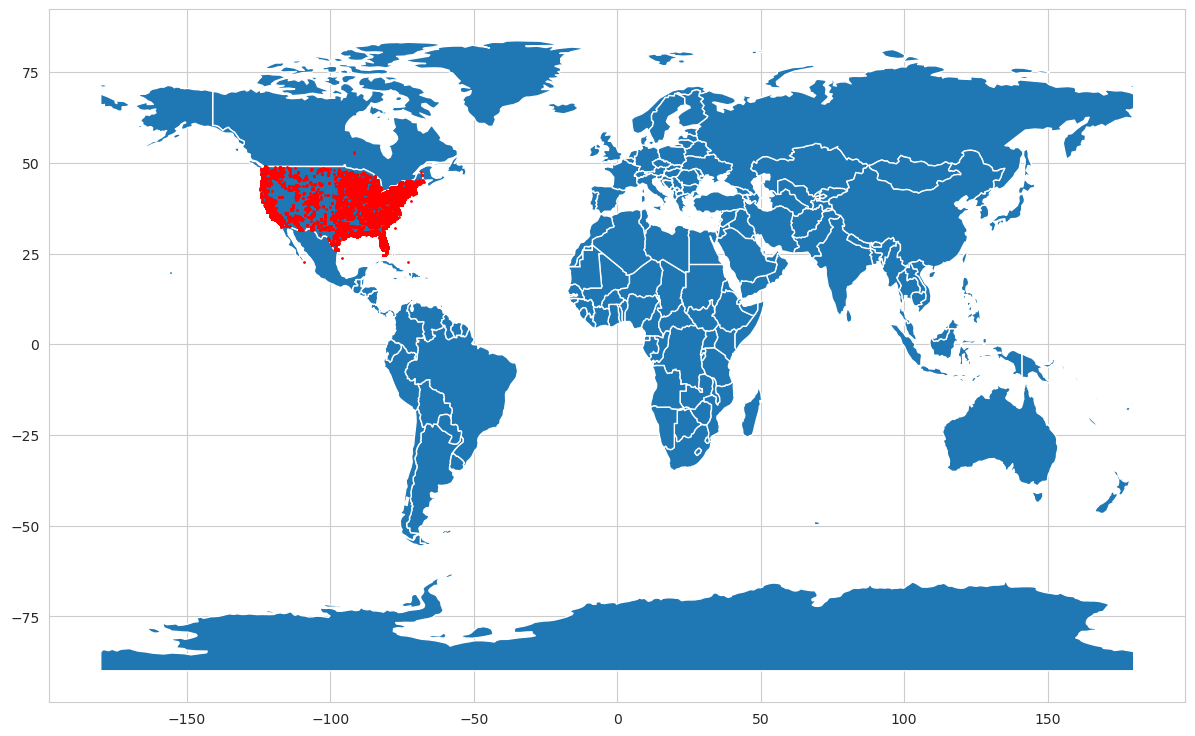

In [723]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df.plot(ax=world.plot(figsize=(15, 9)), marker='o', color='red', markersize=1)

# Fase de transformación

`Escalado/Normalización`

In [726]:
train.drop(columns=['price', 'geometry'], inplace=True)

In [727]:
train.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,category_price
0,1200,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,43.5851,-116.2250,medium
1,694,1,1.0,1,1,1,0,0,0,w/d in unit,carport,38.9137,-104.7800,medium
2,900,2,2.0,0,0,1,0,0,0,w/d hookups,off-street parking,36.7922,-76.1643,medium
4,700,1,1.0,1,1,1,0,0,0,w/d in unit,carport,36.0595,-86.6592,low
5,1649,3,2.0,1,1,1,0,0,0,w/d hookups,attached garage,33.0198,-96.9925,medium


In [728]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181584 entries, 0 to 346478
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   sqfeet                   181584 non-null  int64   
 1   beds                     181584 non-null  int64   
 2   baths                    181584 non-null  float64 
 3   cats_allowed             181584 non-null  int64   
 4   dogs_allowed             181584 non-null  int64   
 5   smoking_allowed          181584 non-null  int64   
 6   wheelchair_access        181584 non-null  int64   
 7   electric_vehicle_charge  181584 non-null  int64   
 8   comes_furnished          181584 non-null  int64   
 9   laundry_options          181584 non-null  object  
 10  parking_options          181584 non-null  object  
 11  lat                      181584 non-null  float64 
 12  long                     181584 non-null  float64 
 13  category_price           181584 non-null  ca

In [734]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23666 entries, 0 to 38497
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sqfeet                   23666 non-null  int64  
 1   beds                     23666 non-null  int64  
 2   baths                    23666 non-null  float64
 3   cats_allowed             23666 non-null  int64  
 4   dogs_allowed             23666 non-null  int64  
 5   smoking_allowed          23666 non-null  int64  
 6   wheelchair_access        23666 non-null  int64  
 7   electric_vehicle_charge  23666 non-null  int64  
 8   comes_furnished          23666 non-null  int64  
 9   laundry_options          23666 non-null  object 
 10  parking_options          23666 non-null  object 
 11  lat                      23666 non-null  float64
 12  long                     23666 non-null  float64
dtypes: float64(3), int64(8), object(2)
memory usage: 2.5+ MB


In [735]:
for i in train.columns:
    if train[i].dtype != 'object':
        print(i)

sqfeet
beds
baths
cats_allowed
dogs_allowed
smoking_allowed
wheelchair_access
electric_vehicle_charge
comes_furnished
lat
long
category_price


In [736]:
train.describe()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,181584.000000,181584.000000,181584.000000,181584.000000,181584.000000,181584.000000,181584.000000,181584.000000,181584.000000,181584.000000,181584.000000
mean,945.858941,1.844298,1.420998,0.803870,0.774138,0.665532,0.096374,0.013041,0.045599,37.812071,-92.967014
std,257.580560,0.686941,0.516261,0.397069,0.418150,0.471805,0.295104,0.113450,0.208614,5.111417,14.981920
min,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.596200,-124.494000
25%,750.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,33.951900,-101.934000
50%,930.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.567250,-88.530700
75%,1100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.690400,-81.548600
max,1712.000000,3.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.865300,-67.482000


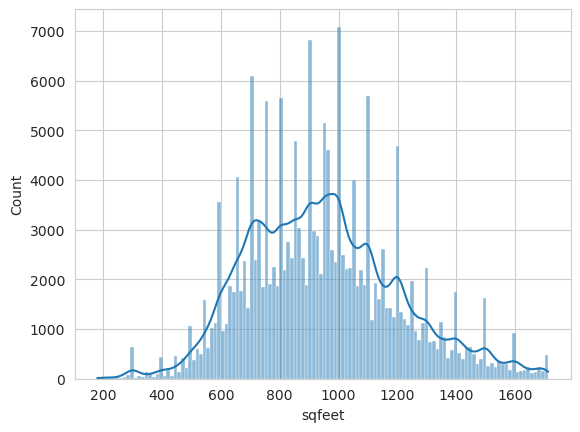

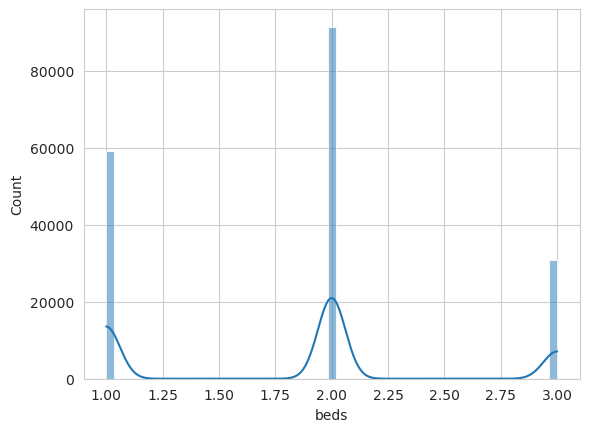

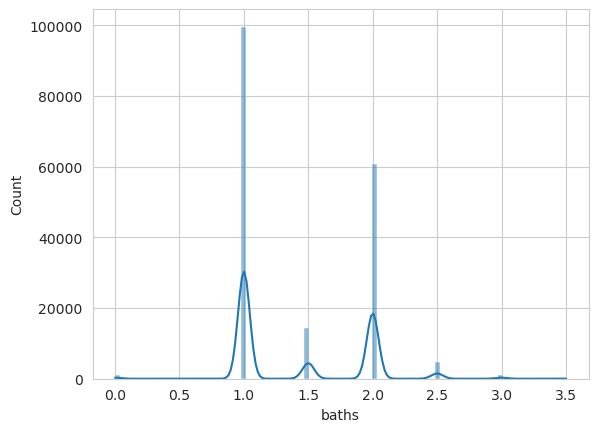

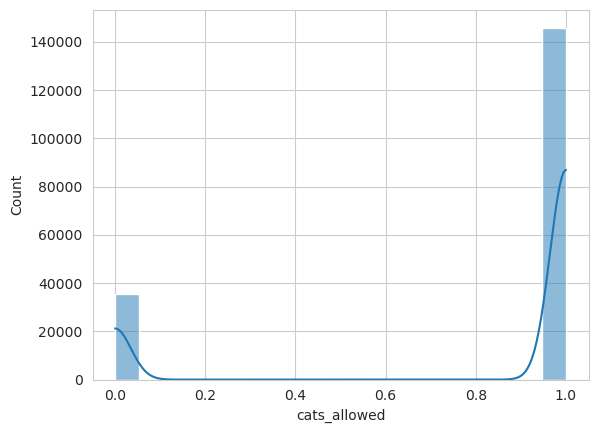

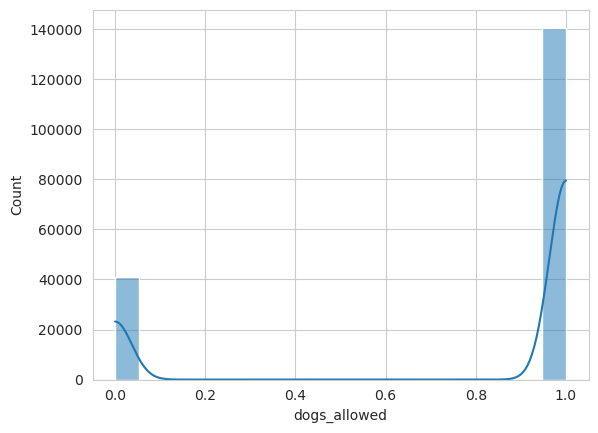

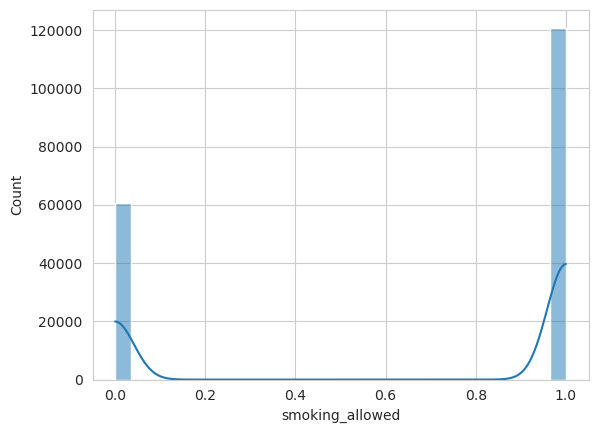

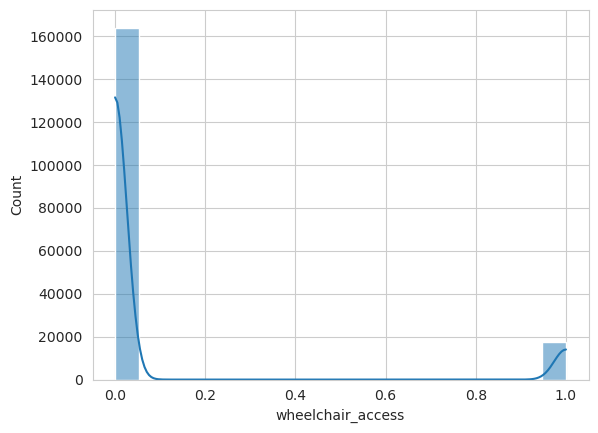

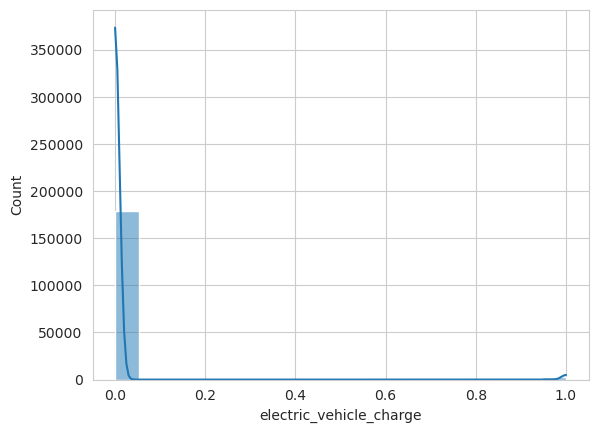

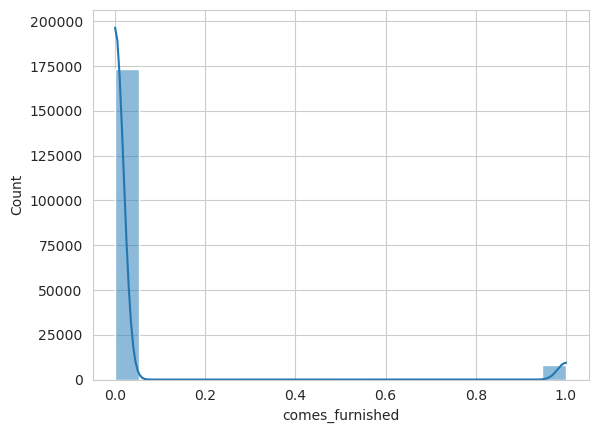

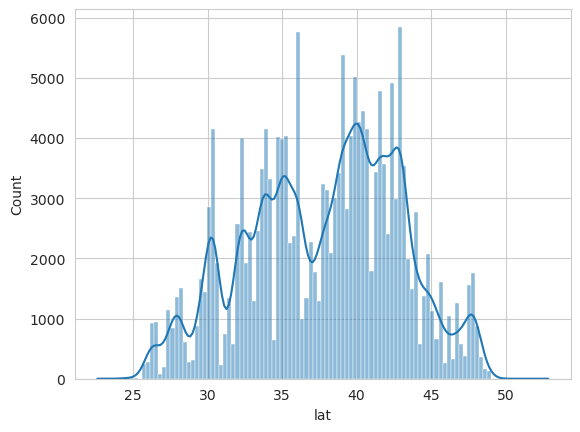

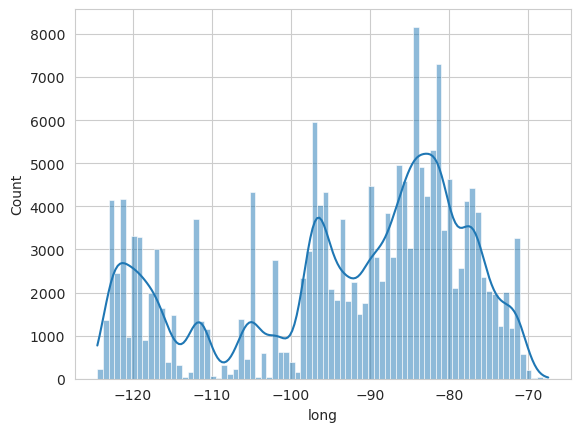

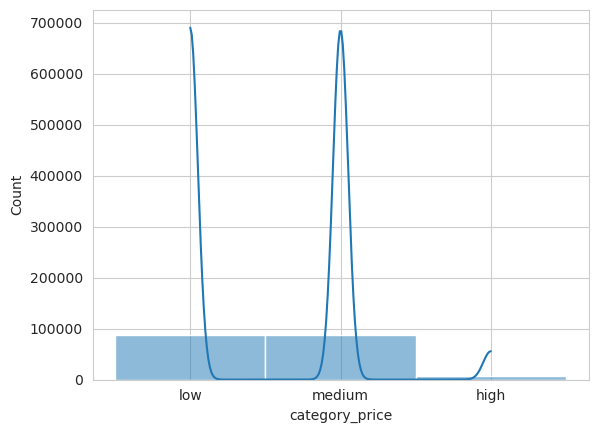

In [124]:
fc.plot_data_hist(train)

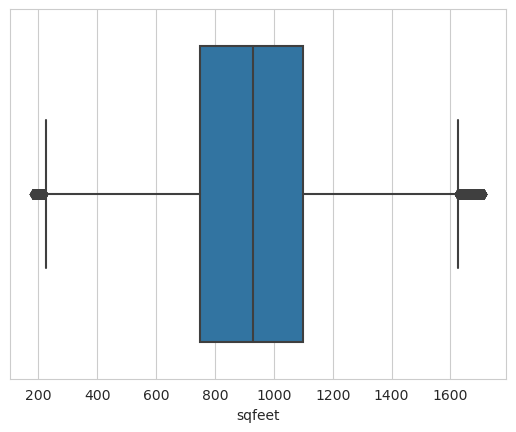

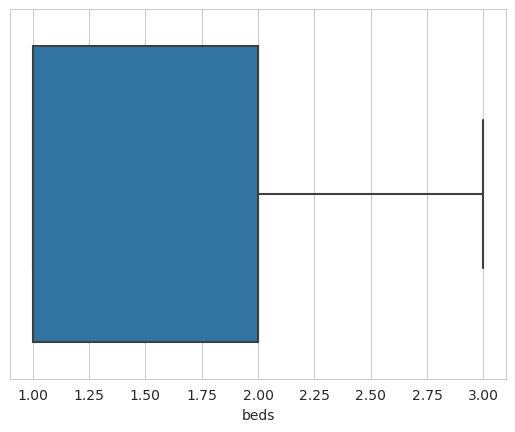

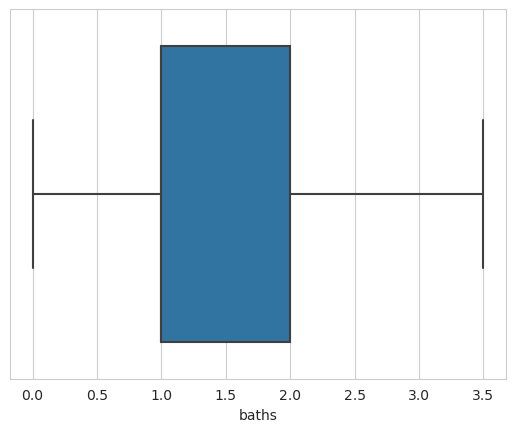

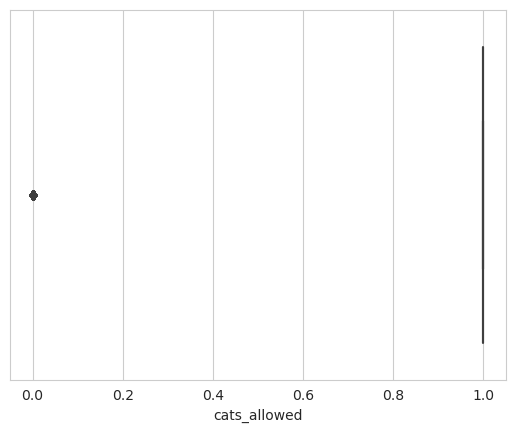

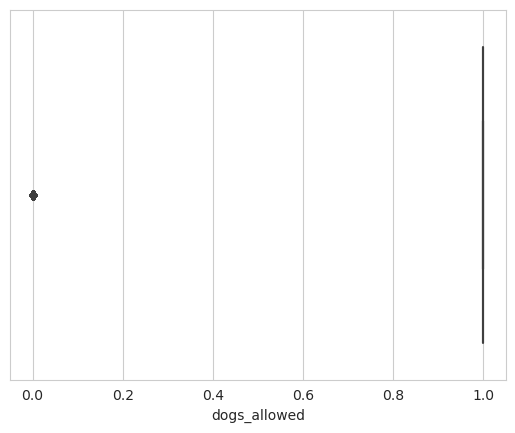

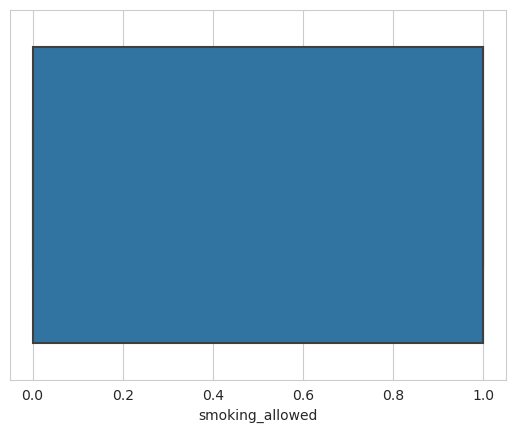

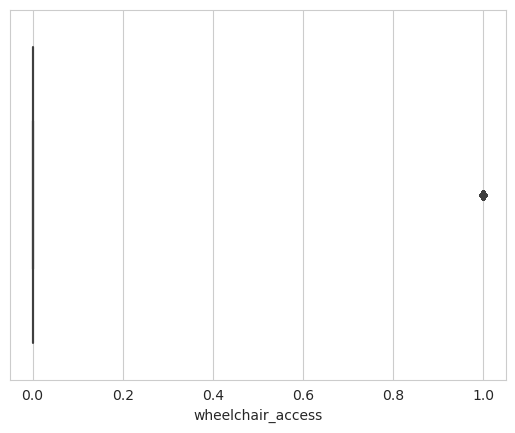

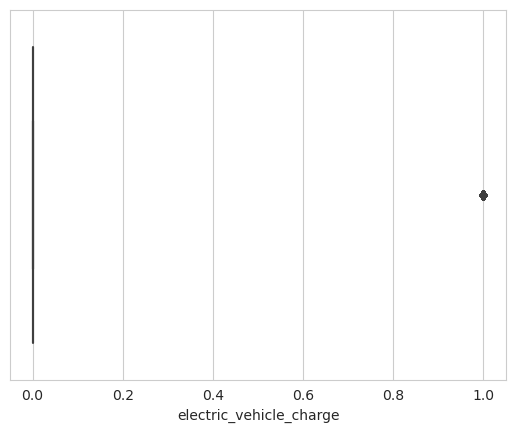

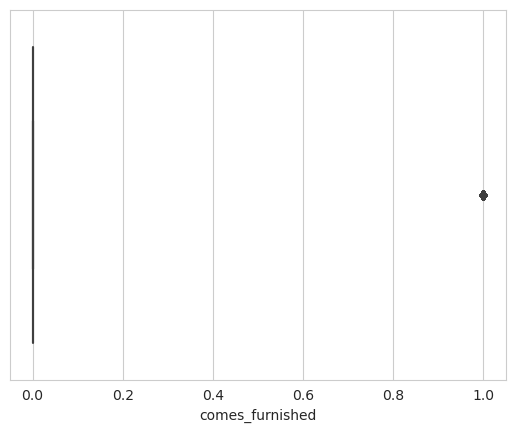

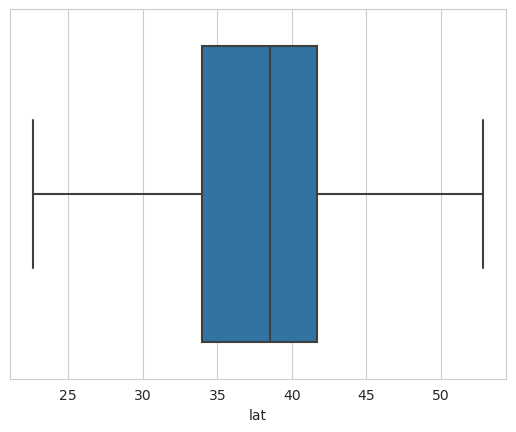

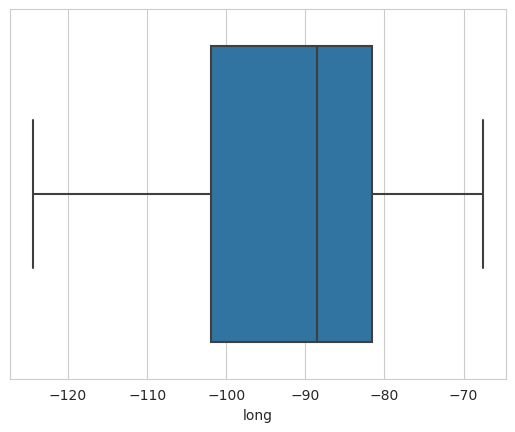

TypeError: Horizontal orientation requires numeric `x` variable.

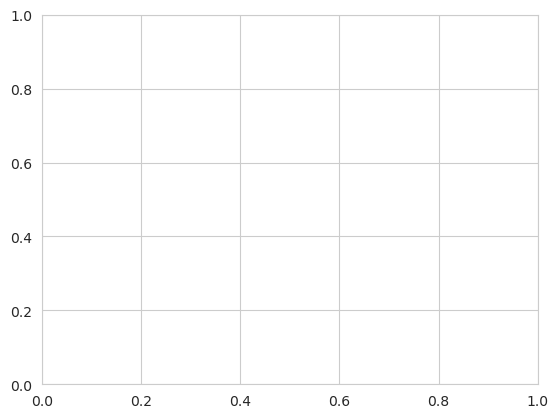

In [125]:
fc.plot_data_box(train)

# Standard Scaler
Hacemos uso de esta técnica.

In [737]:
from sklearn.preprocessing import StandardScaler

In [738]:
# Creamos una copia de nuestro dataframe al momento, para trabajar de manera segura
train_norm = train.copy()

In [739]:
prediction_norm = prediction.copy()

In [740]:
for i in train_norm.columns:
    if train_norm[i].dtype != 'object':
        print(i)

sqfeet
beds
baths
cats_allowed
dogs_allowed
smoking_allowed
wheelchair_access
electric_vehicle_charge
comes_furnished
lat
long
category_price


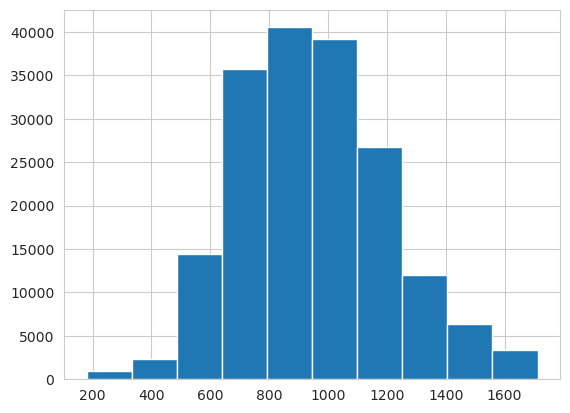

In [130]:
# A excepción de la variable `category_price`, trabajaremos el resto de las variables arriba impresas
# Recordemos la distribución de la variable `sqfeet`
plt.hist(train_norm['sqfeet'])
plt.show()

In [741]:
# Escalamos la variable `sqfeet`
scaler = StandardScaler()
scaler.fit(train_norm[['sqfeet']])
train_norm['sqfeet'] = scaler.transform(train_norm[['sqfeet']])

In [742]:
# Para el test de predicción
# Escalamos la variable `sqfeet`
scaler = StandardScaler()
scaler.fit(prediction_norm[['sqfeet']])
prediction_norm['sqfeet'] = scaler.transform(prediction_norm[['sqfeet']])

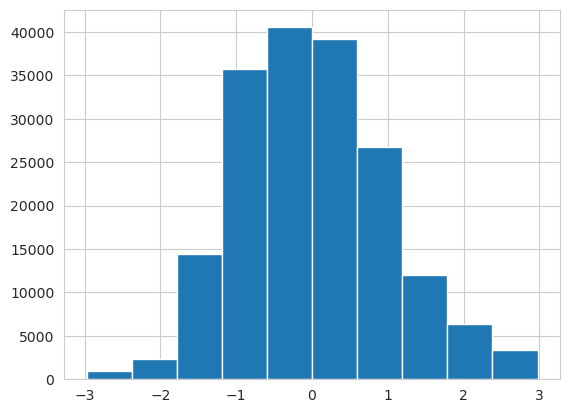

In [132]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['sqfeet'])
plt.show()

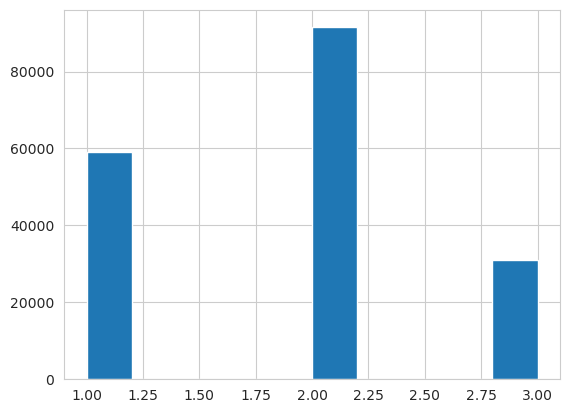

In [133]:
# Recordemos la distribución de la variable `beds`
plt.hist(train_norm['beds'])
plt.show()

In [743]:
# Escalamos la variable `beds`
scaler = StandardScaler()
scaler.fit(train_norm[['beds']])
train_norm['beds'] = scaler.transform(train_norm[['beds']])

In [744]:
# Para predicción
# Escalamos la variable `beds`
scaler = StandardScaler()
scaler.fit(prediction_norm[['beds']])
prediction_norm['beds'] = scaler.transform(prediction_norm[['beds']])

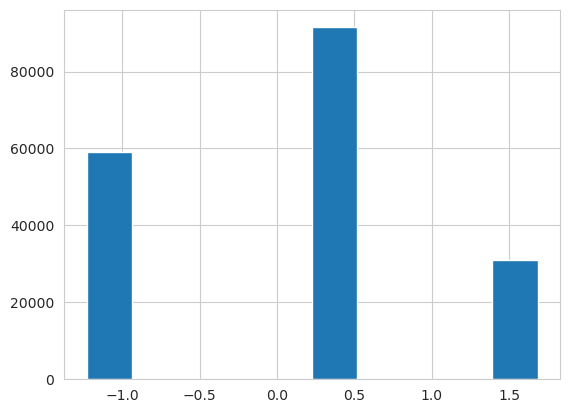

In [135]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['beds'])
plt.show()

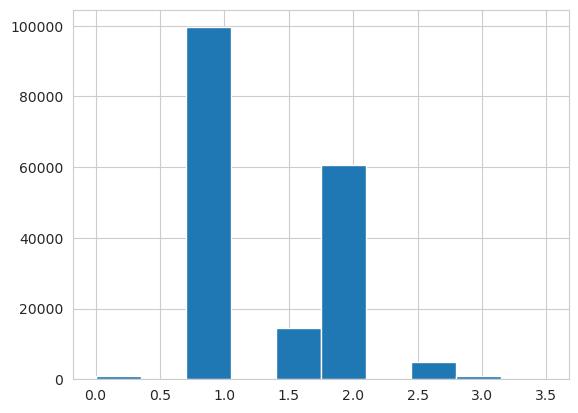

In [136]:
# Recordemos la distribución de la variable `baths`
plt.hist(train_norm['baths'])
plt.show()

In [745]:
# Escalamos la variable `baths`
scaler = StandardScaler()
scaler.fit(train_norm[['baths']])
train_norm['baths'] = scaler.transform(train_norm[['baths']])

In [746]:
# Para predicción
# Escalamos la variable `baths`
scaler = StandardScaler()
scaler.fit(prediction_norm[['baths']])
prediction_norm['baths'] = scaler.transform(prediction_norm[['baths']])

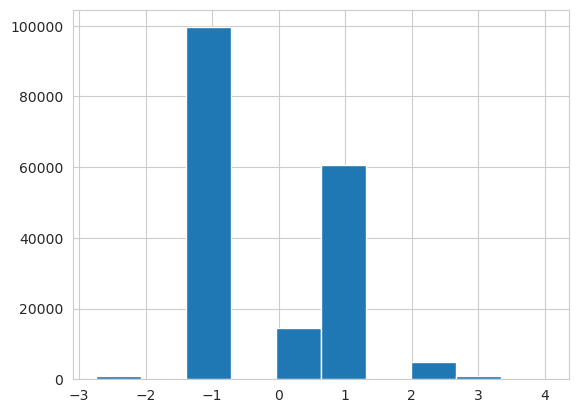

In [138]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['baths'])
plt.show()

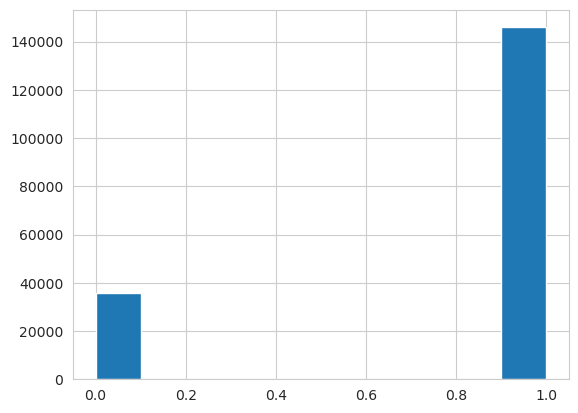

In [139]:
# Recordemos la distribución de la variable `cats_allowed`
plt.hist(train_norm['cats_allowed'])
plt.show()

In [747]:
# Escalamos la variable `cats_allowed`
scaler = StandardScaler()
scaler.fit(train_norm[['cats_allowed']])
train_norm['cats_allowed'] = scaler.transform(train_norm[['cats_allowed']])

In [748]:
# Para predicción
# Escalamos la variable `cats_allowed`
scaler = StandardScaler()
scaler.fit(prediction_norm[['cats_allowed']])
prediction_norm['cats_allowed'] = scaler.transform(prediction_norm[['cats_allowed']])

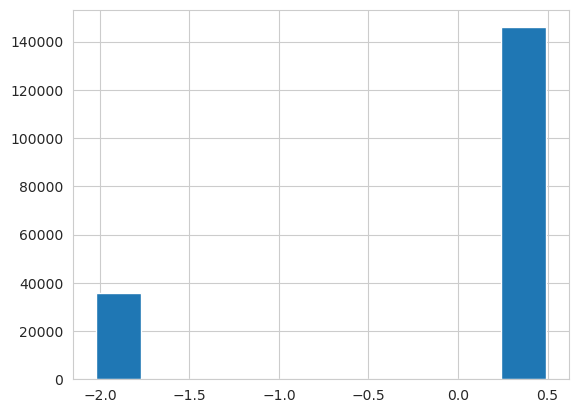

In [141]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['cats_allowed'])
plt.show()

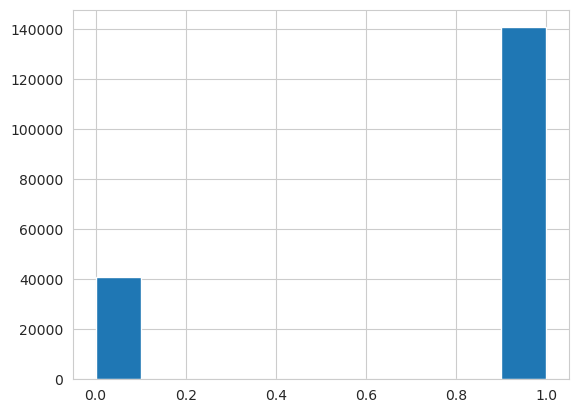

In [142]:
# Recordemos la distribución de la variable `dogs_allowed`
plt.hist(train_norm['dogs_allowed'])
plt.show()

In [749]:
# Escalamos la variable `dogs_allowed`
scaler = StandardScaler()
scaler.fit(train_norm[['dogs_allowed']])
train_norm['dogs_allowed'] = scaler.transform(train_norm[['dogs_allowed']])

In [750]:
# Para predicción
# Escalamos la variable `dogs_allowed`
scaler = StandardScaler()
scaler.fit(prediction_norm[['dogs_allowed']])
prediction_norm['dogs_allowed'] = scaler.transform(prediction_norm[['dogs_allowed']])

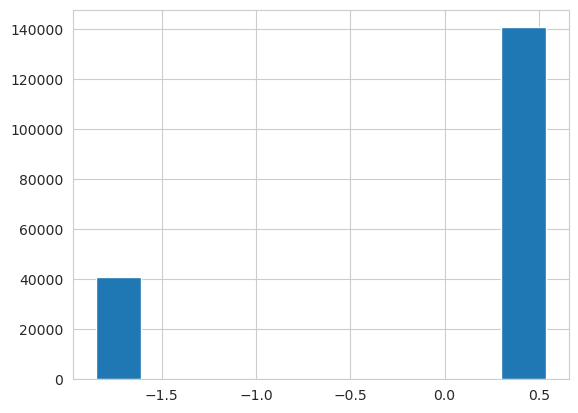

In [144]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['dogs_allowed'])
plt.show()

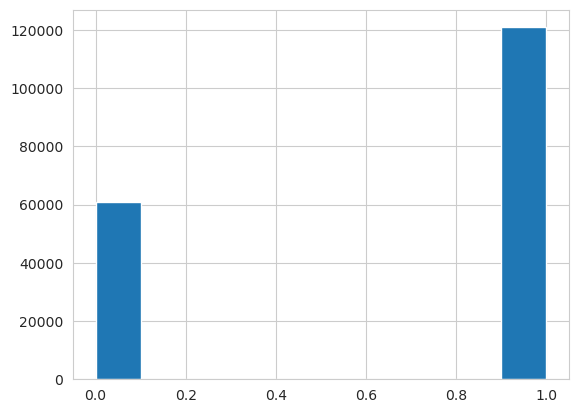

In [145]:
# Recordemos la distribución de la variable `smoking_allowed`
plt.hist(train_norm['smoking_allowed'])
plt.show()

In [751]:
# Escalamos la variable `smoking_allowed`
scaler = StandardScaler()
scaler.fit(train_norm[['smoking_allowed']])
train_norm['smoking_allowed'] = scaler.transform(train_norm[['smoking_allowed']])

In [752]:
# Para predicción
# Escalamos la variable `smoking_allowed`
scaler = StandardScaler()
scaler.fit(prediction_norm[['smoking_allowed']])
prediction_norm['smoking_allowed'] = scaler.transform(prediction_norm[['smoking_allowed']])

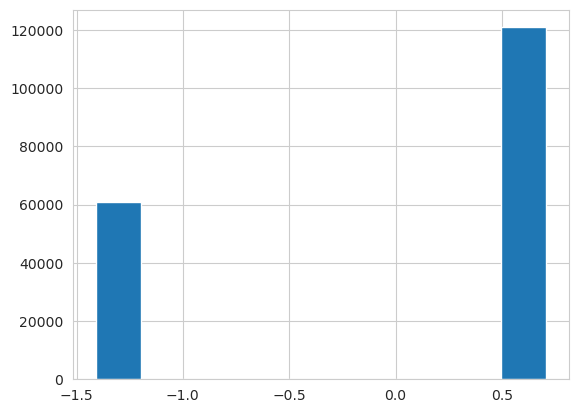

In [147]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['smoking_allowed'])
plt.show()

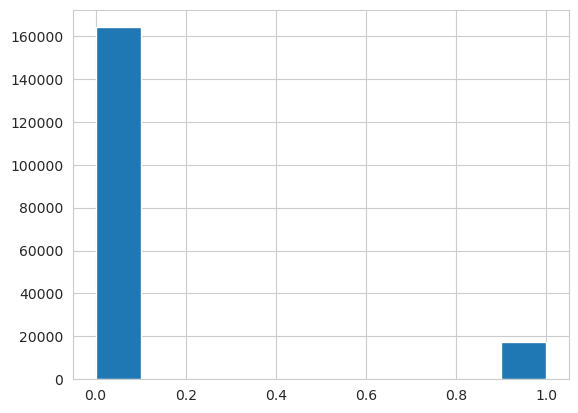

In [148]:
# Recordemos la distribución de la variable `wheelchair_access`
plt.hist(train_norm['wheelchair_access'])
plt.show()

In [753]:
# Escalamos la variable `wheelchair_access`
scaler = StandardScaler()
scaler.fit(train_norm[['wheelchair_access']])
train_norm['wheelchair_access'] = scaler.transform(train_norm[['wheelchair_access']])

In [754]:
# Para predicción
# Escalamos la variable `wheelchair_access`
scaler = StandardScaler()
scaler.fit(prediction_norm[['wheelchair_access']])
prediction_norm['wheelchair_access'] = scaler.transform(prediction_norm[['wheelchair_access']])

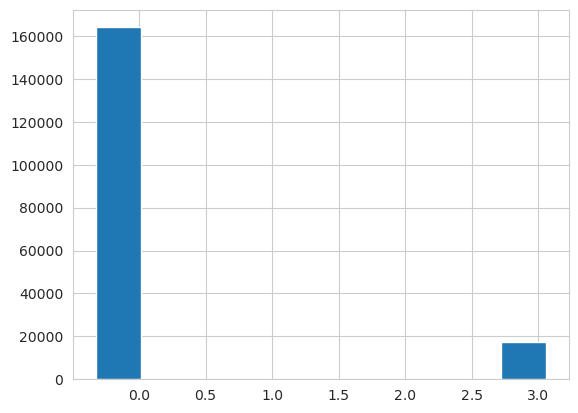

In [150]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['wheelchair_access'])
plt.show()

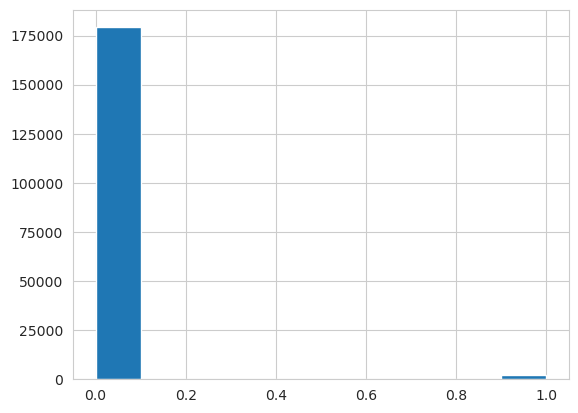

In [151]:
# Recordemos la distribución de la variable `electric_vehicle_charge`
plt.hist(train_norm['electric_vehicle_charge'])
plt.show()

In [755]:
# Escalamos la variable `electric_vehicle_charge`
scaler = StandardScaler()
scaler.fit(train_norm[['electric_vehicle_charge']])
train_norm['electric_vehicle_charge'] = scaler.transform(train_norm[['electric_vehicle_charge']])

In [756]:
# Para predicción
# Escalamos la variable `electric_vehicle_charge`
scaler = StandardScaler()
scaler.fit(prediction_norm[['electric_vehicle_charge']])
prediction_norm['electric_vehicle_charge'] = scaler.transform(prediction_norm[['electric_vehicle_charge']])

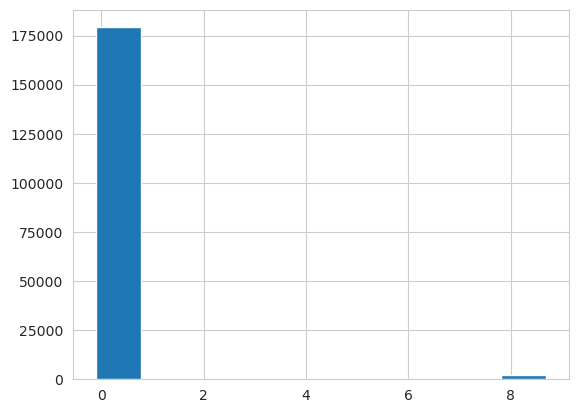

In [153]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['electric_vehicle_charge'])
plt.show()

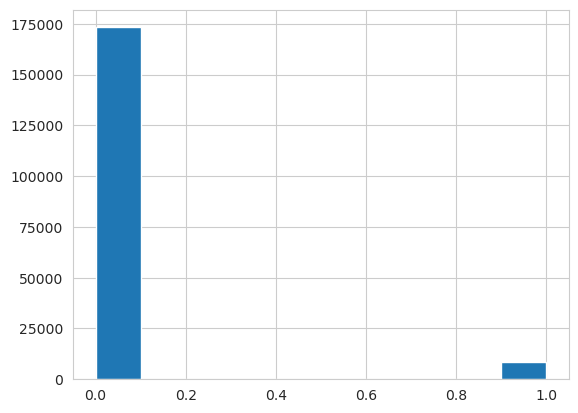

In [154]:
# Recordemos la distribución de la variable `comes_furnished`
plt.hist(train_norm['comes_furnished'])
plt.show()

In [757]:
# Escalamos la variable `comes_furnished`
scaler = StandardScaler()
scaler.fit(train_norm[['comes_furnished']])
train_norm['comes_furnished'] = scaler.transform(train_norm[['comes_furnished']])

In [758]:
# Para predicción
# Escalamos la variable `comes_furnished`
scaler = StandardScaler()
scaler.fit(prediction_norm[['comes_furnished']])
prediction_norm['comes_furnished'] = scaler.transform(prediction_norm[['comes_furnished']])

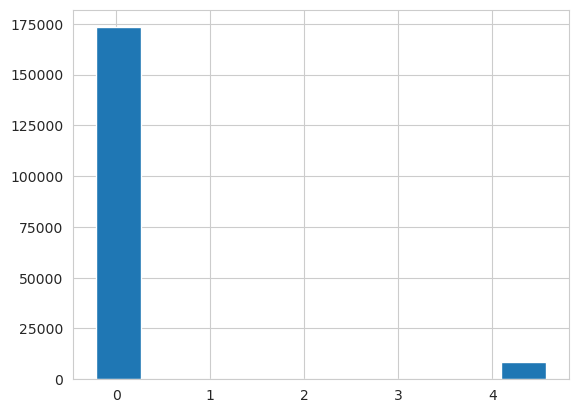

In [156]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['comes_furnished'])
plt.show()

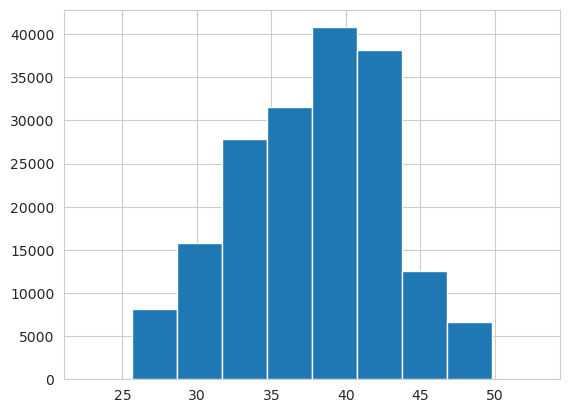

In [157]:
# Recordemos la distribución de la variable `lat`
plt.hist(train_norm['lat'])
plt.show()

In [759]:
# Escalamos la variable `lat`
scaler = StandardScaler()
scaler.fit(train_norm[['lat']])
train_norm['lat'] = scaler.transform(train_norm[['lat']])

In [760]:
# Para predicción
# Escalamos la variable `lat`
scaler = StandardScaler()
scaler.fit(prediction_norm[['lat']])
prediction_norm['lat'] = scaler.transform(prediction_norm[['lat']])

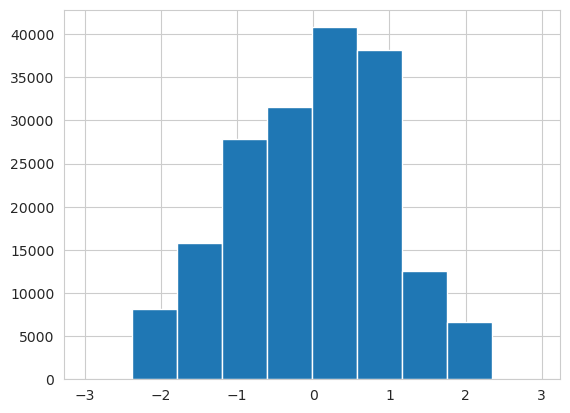

In [159]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['lat'])
plt.show()

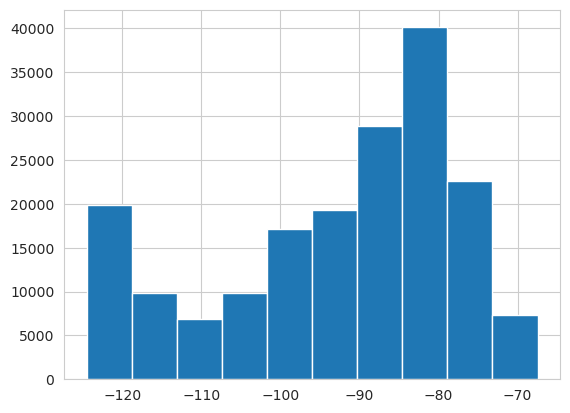

In [160]:
# Recordemos la distribución de la variable `long`
plt.hist(train_norm['long'])
plt.show()

In [761]:
# Escalamos la variable `long`
scaler = StandardScaler()
scaler.fit(train_norm[['long']])
train_norm['long'] = scaler.transform(train_norm[['long']])

In [762]:
# Para predicción
# Escalamos la variable `long`
scaler = StandardScaler()
scaler.fit(prediction_norm[['long']])
prediction_norm['long'] = scaler.transform(prediction_norm[['long']])

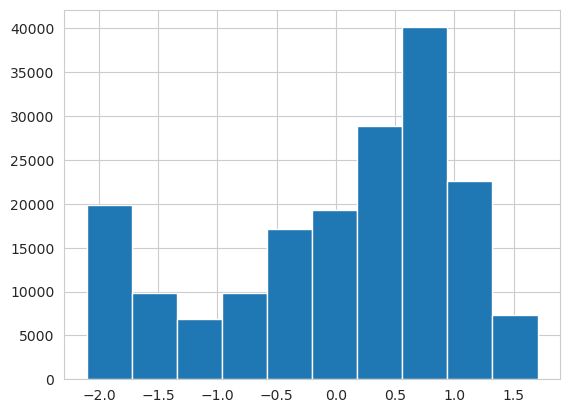

In [162]:
# Observamos como quedó la distribución después de escalar
plt.hist(train_norm['long'])
plt.show()

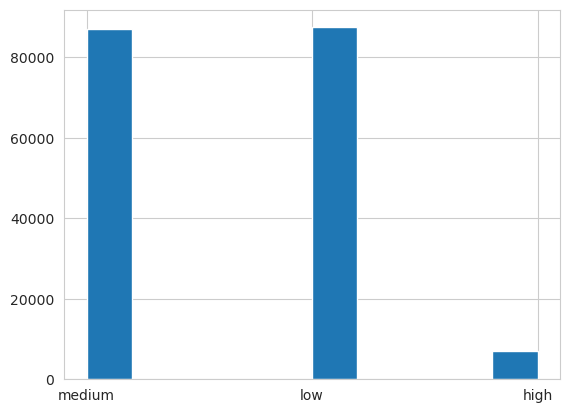

In [163]:
# Recordemos la distribución de la variable `category_price`
plt.hist(train_norm['category_price'])
plt.show()

# Fase de transformación

`Codificación de variables categóricas`

In [763]:
for i in train_norm.columns:
    if train_norm[i].dtype == 'object':
        print(i)

laundry_options
parking_options


In [764]:
for i in prediction.columns:
    if prediction[i].dtype == 'object':
        print(i)

laundry_options
parking_options


In [184]:
# 400 unique in `region`
# 12 unique in `type`
# 5 unique in `laundry_options`
# 7 unique in `parking_options`
# 50 unique in `state`
# 3 unique in `category_price`
train_norm['category_price'].unique()

['medium', 'low', 'high']
Categories (3, object): ['low' < 'medium' < 'high']

In [449]:
# 400 unique in `region`. 394
# 12 unique in `type`. 10
# 5 unique in `laundry_options`. 5
# 7 unique in `parking_options`. 7
# 50 unique in `state`. 51
len(prediction_norm['region'].unique())

394

In [ ]:
fc.plot_count_box(train_norm)

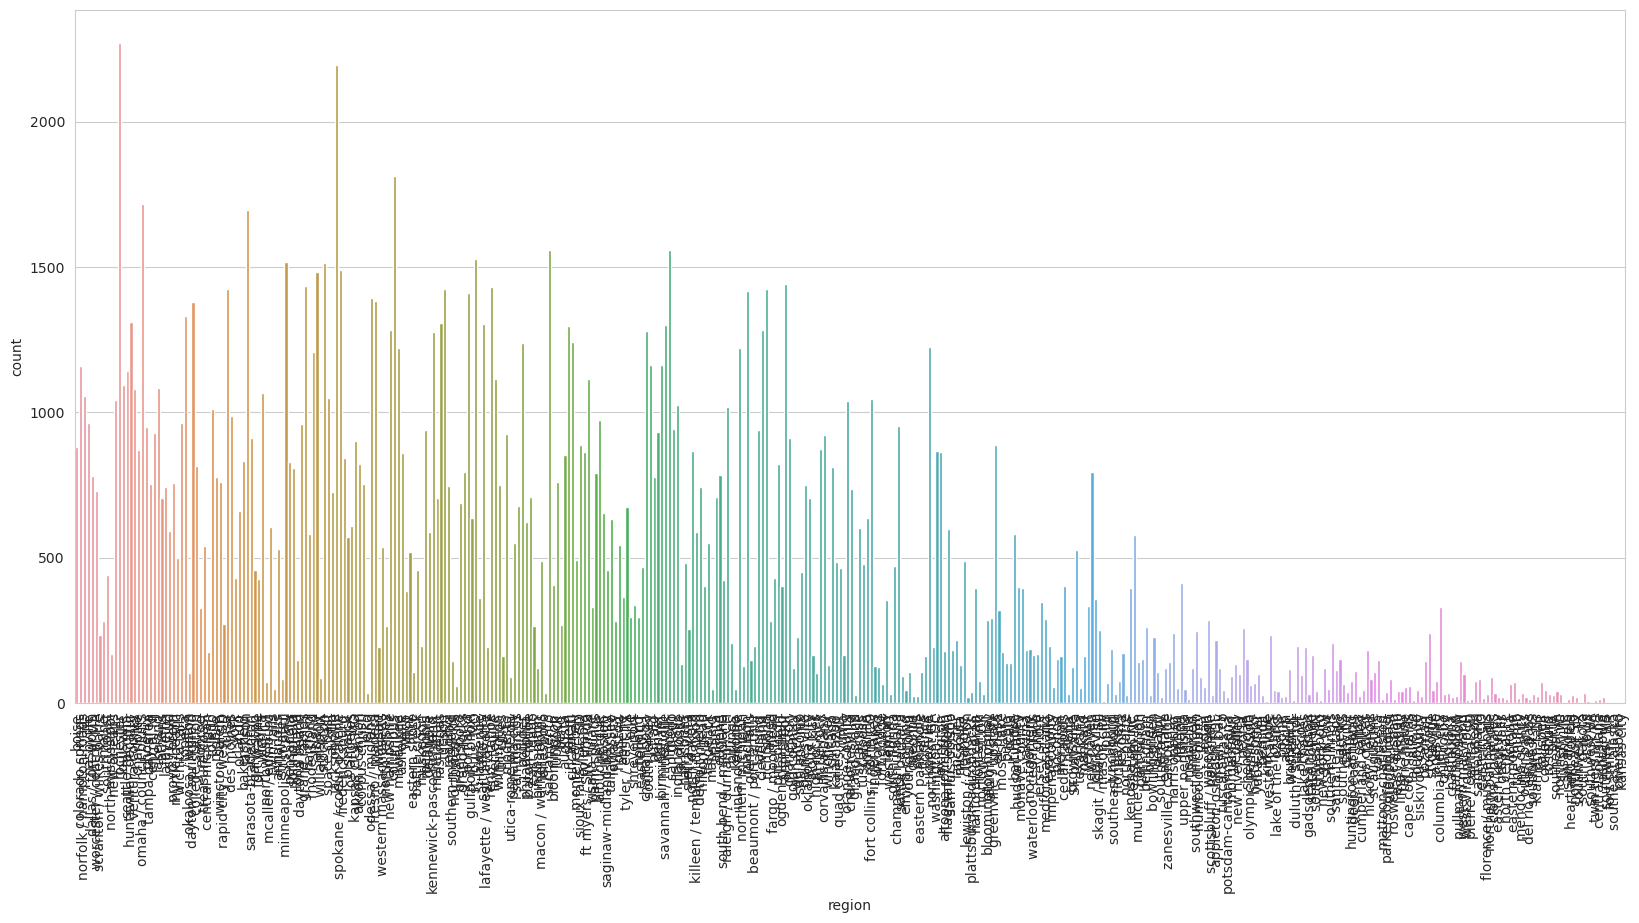

In [171]:
plt.figure(figsize=(20,9))
sns.countplot(x='region', data=train_norm)
plt.xticks(rotation=90)
plt.show()

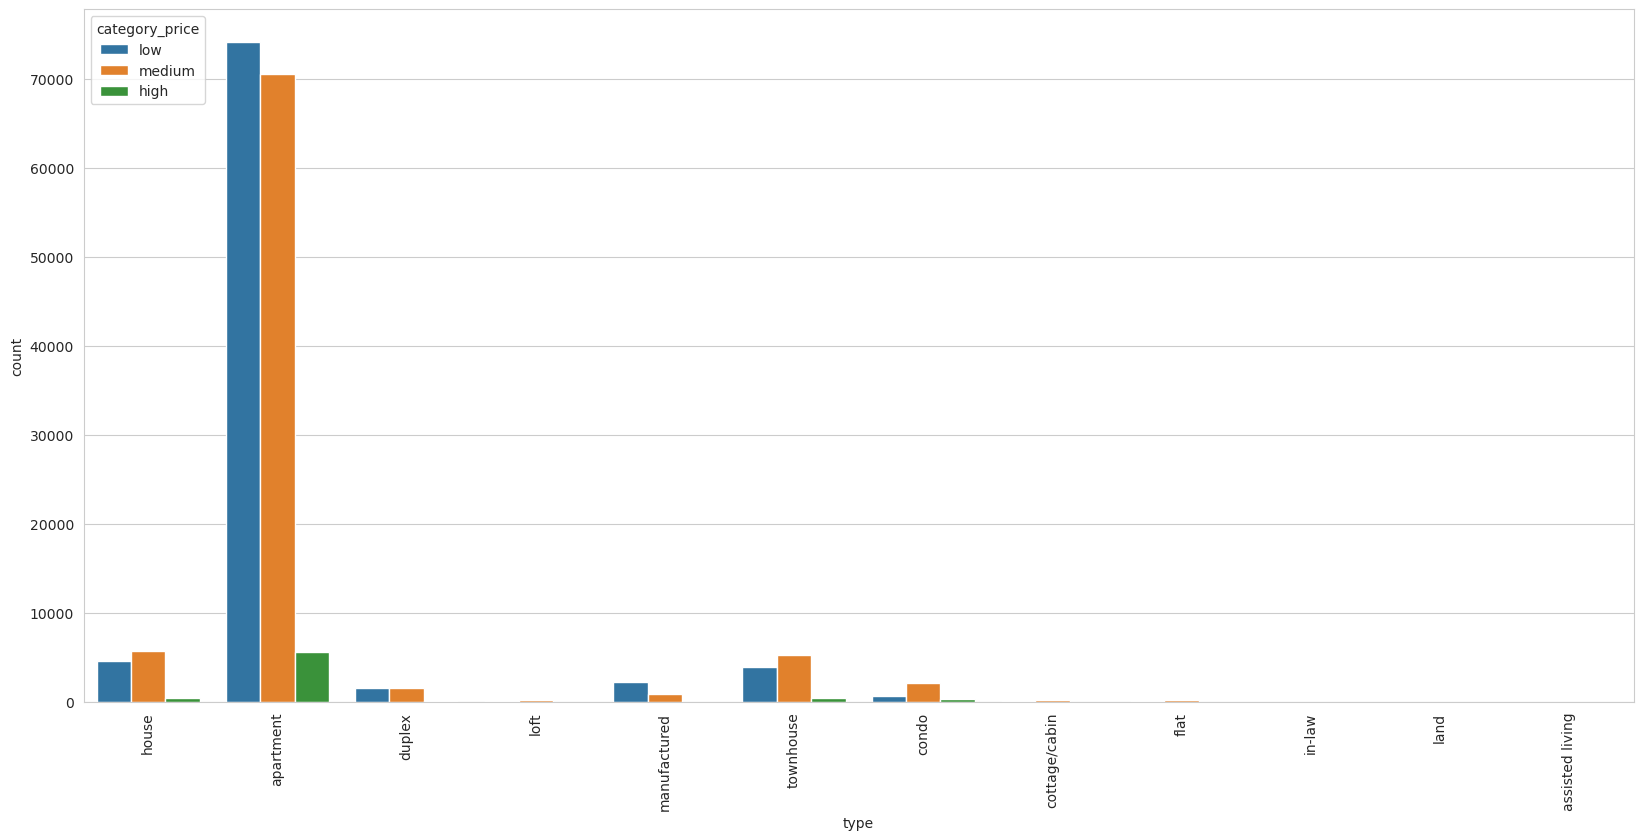

In [172]:
plt.figure(figsize=(20,9))
sns.countplot(x='type', data=train_norm, hue='category_price')
plt.xticks(rotation=90)
plt.show()

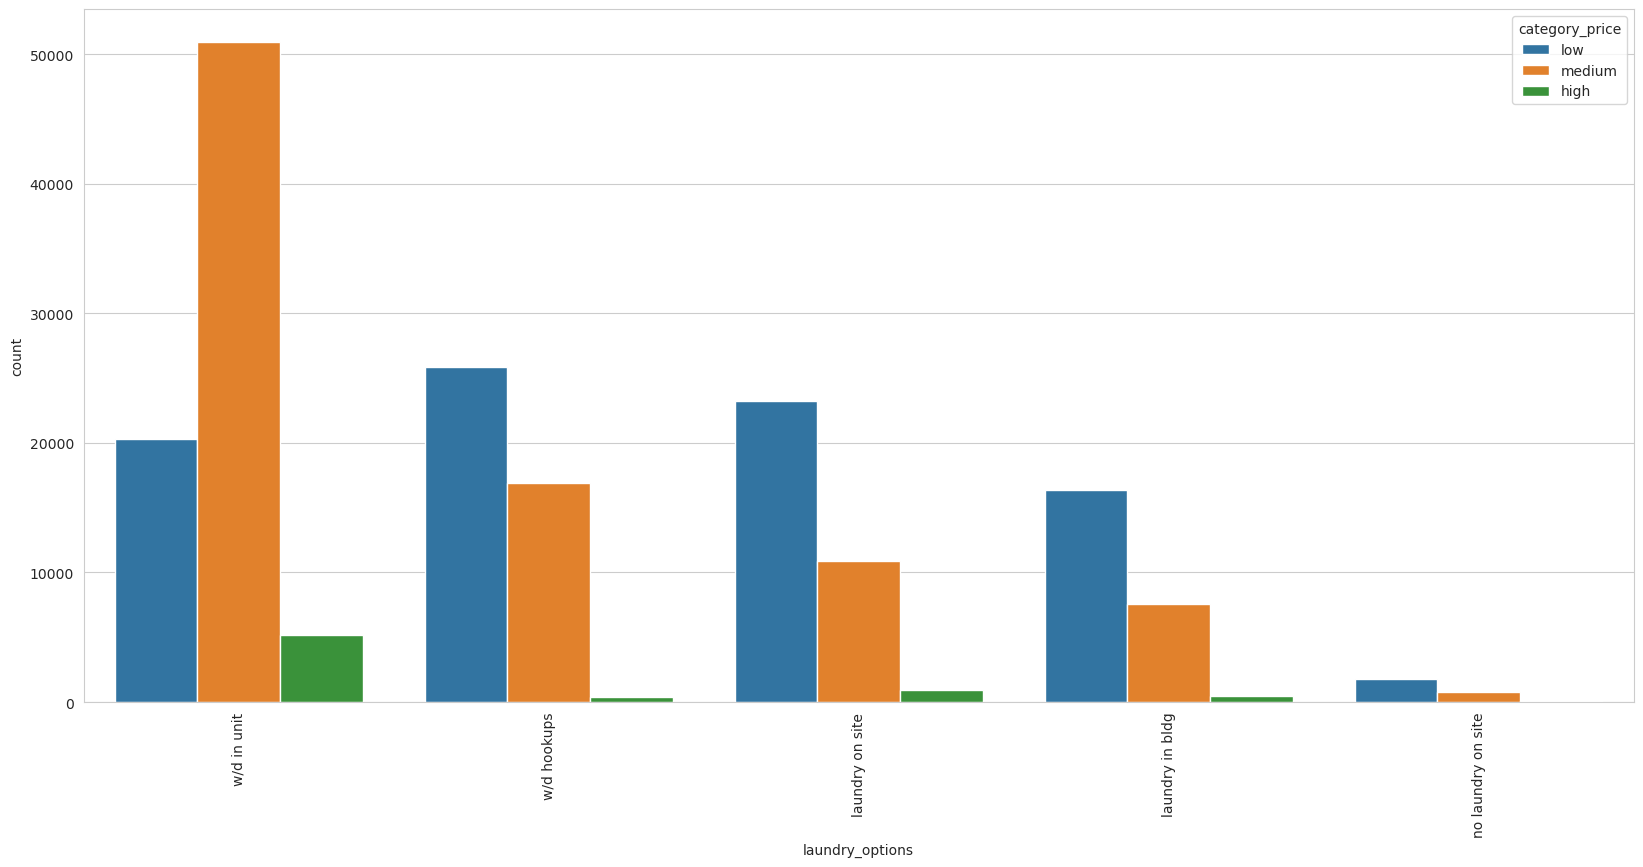

In [173]:
plt.figure(figsize=(20,9))
sns.countplot(x='laundry_options', data=train_norm, hue='category_price')
plt.xticks(rotation=90)
plt.show()

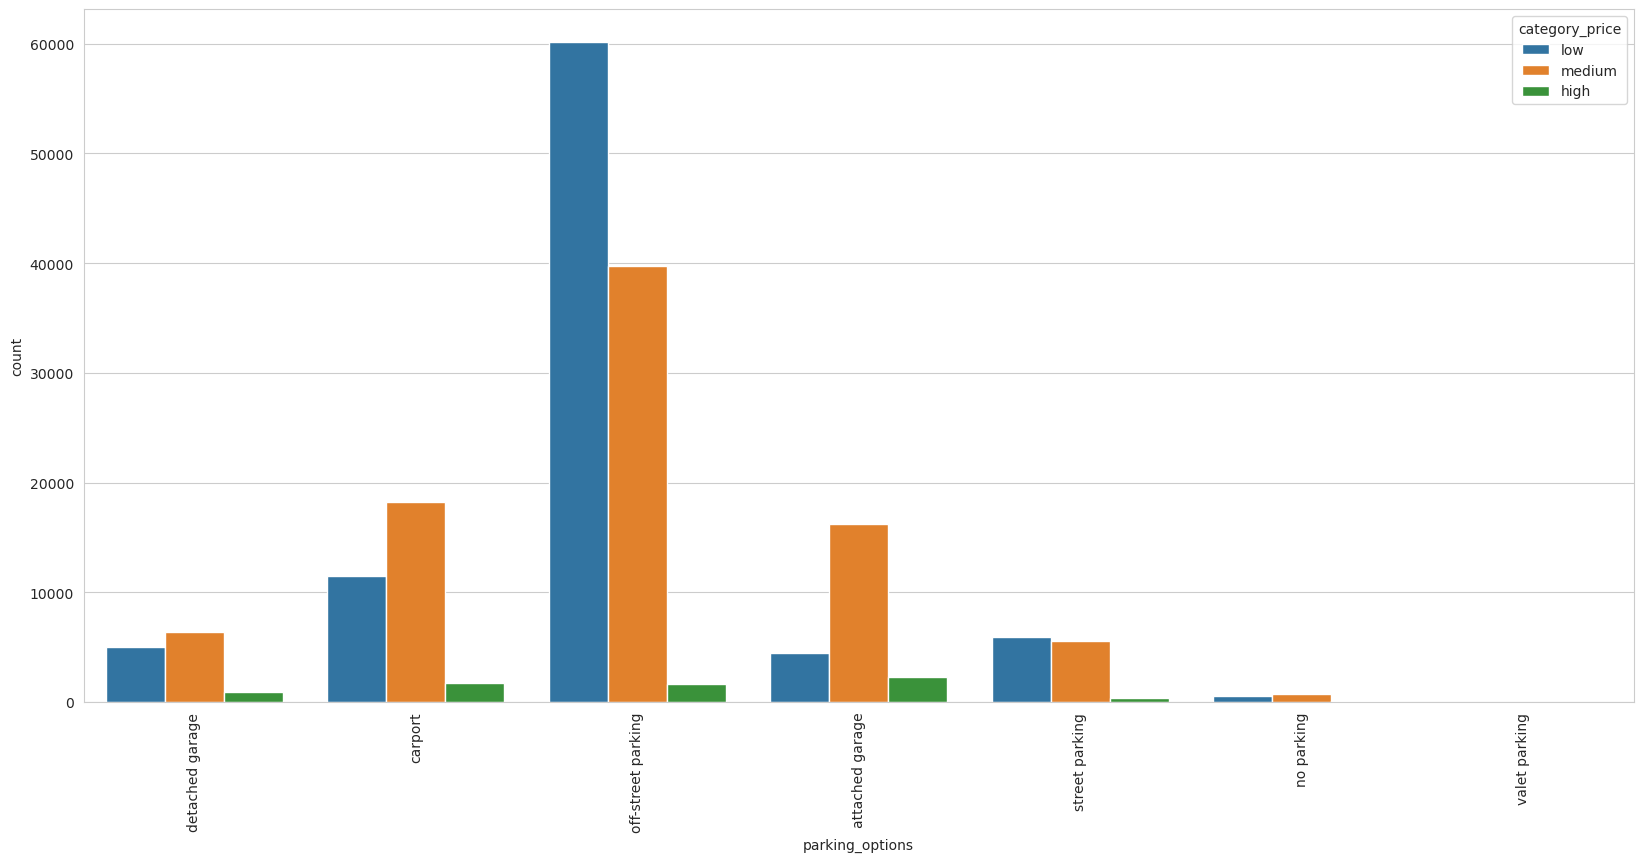

In [174]:
plt.figure(figsize=(20,9))
sns.countplot(x='parking_options', data=train_norm, hue='category_price')
plt.xticks(rotation=90)
plt.show()

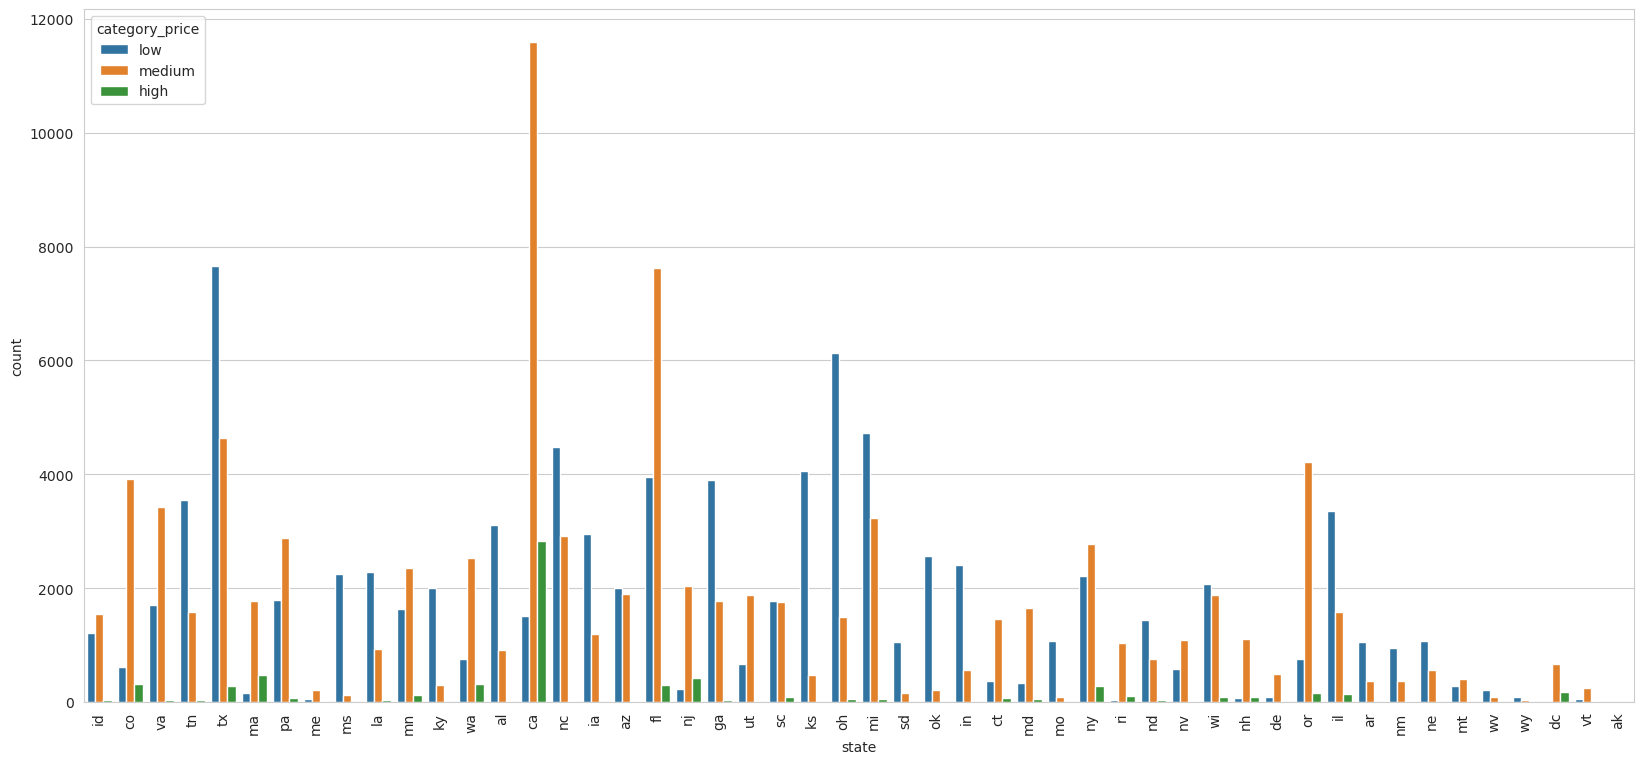

In [175]:
plt.figure(figsize=(20,9))
sns.countplot(x='state', data=train_norm, hue='category_price')
plt.xticks(rotation=90)
plt.show()

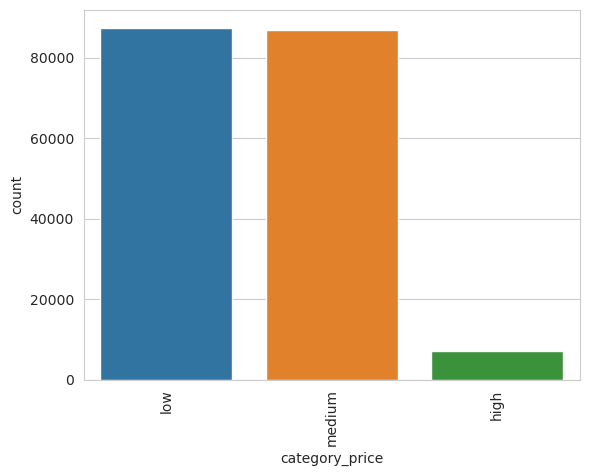

In [176]:
sns.countplot(x='category_price', data=train_norm)
plt.xticks(rotation=90)
plt.show()

Cantidad de registros en nuestras variables categóricas:
400 unique in `region`
12 unique in `type`
5 unique in `laundry_options`
7 unique in `parking_options`
50 unique in `state`
3 unique in `category_price`

**Veamos la aplicación de One Hot Encoder para la codificación de nuestras variables categóricas.**

In [766]:
train_norm_2 = train_norm.copy()

In [767]:
prediction_norm_2 = prediction_norm.copy()

In [768]:
from sklearn.preprocessing import OneHotEncoder

In [331]:
# # Codificación de la variable `region`
# region_encoded = train_norm_2[['region']]
# ohe = OneHotEncoder(handle_unknown='ignore')
# region_encoded = pd.DataFrame(ohe.fit_transform(region_encoded).toarray())
#
# for i in region_encoded.columns:
#     region_encoded.rename(columns={i: 'region_' + str(i)}, inplace=True)
#
# # Incorporamos el dataframe codificado al dataframe original
# train_norm_2 = train_norm_2.join(region_encoded)

In [404]:
# # Para predicción
# # Codificación de la variable `region`
# region_encoded = prediction_norm_2[['region']]
# ohe = OneHotEncoder(handle_unknown='ignore')
# region_encoded = pd.DataFrame(ohe.fit_transform(region_encoded).toarray())
#
# for i in region_encoded.columns:
#     region_encoded.rename(columns={i: 'region_' + str(i)}, inplace=True)
#
# # Incorporamos el dataframe codificado al dataframe original
# prediction_norm_2 = prediction_norm_2.join(region_encoded)

In [536]:
# # Codificación de la variable `type`
# type_encoded = train_norm_2[['type']]
# ohe = OneHotEncoder(handle_unknown='ignore')
# type_encoded = pd.DataFrame(ohe.fit_transform(type_encoded).toarray())
#
# for i in type_encoded.columns:
#     type_encoded.rename(columns={i: 'type_' + str(i)}, inplace=True)
#
# # Incorporamos el dataframe codificado al dataframe original
# train_norm_2 = train_norm_2.join(type_encoded)

In [537]:
# # Para predicción
# # Codificación de la variable `type`
# type_encoded = prediction_norm_2[['type']]
# ohe = OneHotEncoder(handle_unknown='ignore')
# type_encoded = pd.DataFrame(ohe.fit_transform(type_encoded).toarray())
#
# for i in type_encoded.columns:
#     type_encoded.rename(columns={i: 'type_' + str(i)}, inplace=True)
#
# # Incorporamos el dataframe codificado al dataframe original
# prediction_norm_2 = prediction_norm_2.join(type_encoded)

In [769]:
# Codificación de la variable `laundry_options`
laundry_encoded = train_norm_2[['laundry_options']]
ohe = OneHotEncoder(handle_unknown='ignore')
laundry_encoded = pd.DataFrame(ohe.fit_transform(laundry_encoded).toarray())

for i in laundry_encoded.columns:
    laundry_encoded.rename(columns={i: 'laundry_' + str(i)}, inplace=True)

# Incorporamos el dataframe codificado al dataframe original
train_norm_2 = train_norm_2.join(laundry_encoded)

In [770]:
# Para predicción
# Codificación de la variable `laundry_options`
laundry_encoded = prediction_norm_2[['laundry_options']]
ohe = OneHotEncoder(handle_unknown='ignore')
laundry_encoded = pd.DataFrame(ohe.fit_transform(laundry_encoded).toarray())

for i in laundry_encoded.columns:
    laundry_encoded.rename(columns={i: 'laundry_' + str(i)}, inplace=True)

# Incorporamos el dataframe codificado al dataframe original
prediction_norm_2 = prediction_norm_2.join(laundry_encoded)

In [775]:
# Codificación de la variable `parking_options`
parking_encoded = train_norm_2[['parking_options']]
ohe = OneHotEncoder(handle_unknown='ignore')
parking_encoded = pd.DataFrame(ohe.fit_transform(parking_encoded).toarray())

for i in parking_encoded.columns:
    parking_encoded.rename(columns={i: 'parking_' + str(i)}, inplace=True)

# Incorporamos el dataframe codificado al dataframe original
train_norm_2 = train_norm_2.join(parking_encoded)

In [771]:
# Para predicción
# Codificación de la variable `parking_options`
parking_encoded = prediction_norm_2[['parking_options']]
ohe = OneHotEncoder(handle_unknown='ignore')
parking_encoded = pd.DataFrame(ohe.fit_transform(parking_encoded).toarray())

for i in parking_encoded.columns:
    parking_encoded.rename(columns={i: 'parking_' + str(i)}, inplace=True)

# Incorporamos el dataframe codificado al dataframe original
prediction_norm_2 = prediction_norm_2.join(parking_encoded)

In [772]:
# # Codificación de la variable `state`
# state_encoded = train_norm_2[['state']]
# ohe = OneHotEncoder(handle_unknown='ignore')
# state_encoded = pd.DataFrame(ohe.fit_transform(state_encoded).toarray())
#
# for i in state_encoded.columns:
#     state_encoded.rename(columns={i: 'state_' + str(i)}, inplace=True)
#
# # Incorporamos el dataframe codificado al dataframe original
# train_norm_2 = train_norm_2.join(state_encoded)

KeyError: "None of [Index(['state'], dtype='object')] are in the [columns]"

In [408]:
# # Para predicción
# # Codificación de la variable `state`
# state_encoded = prediction_norm_2[['state']]
# ohe = OneHotEncoder(handle_unknown='ignore')
# state_encoded = pd.DataFrame(ohe.fit_transform(state_encoded).toarray())
#
# for i in state_encoded.columns:
#     state_encoded.rename(columns={i: 'state_' + str(i)}, inplace=True)
#
# # Incorporamos el dataframe codificado al dataframe original
# prediction_norm_2 = prediction_norm_2.join(state_encoded)

In [776]:
train_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,0.986650,0.226661,1.121533,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,w/d in unit,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.977790,-1.229072,-0.815478,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,w/d in unit,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.178038,0.226661,1.121533,-2.024517,-1.851344,0.708912,-0.326577,-0.114948,-0.21858,w/d hookups,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.954496,-1.229072,-0.815478,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,w/d in unit,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.729798,1.682394,1.121533,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,w/d hookups,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [777]:
prediction_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,0.412438,0.144190,0.683823,-1.889341,-1.749896,0.744798,-0.343831,-0.137159,-0.24865,w/d in unit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.044625,0.005152,-0.638401,-1.889341,-1.749896,0.744798,-0.343831,-0.137159,-0.24865,w/d hookups,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.169731,0.005152,0.683823,0.529285,0.571463,0.744798,2.908407,-0.137159,-0.24865,w/d in unit,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.332370,0.005152,1.344935,0.529285,0.571463,-1.342647,-0.343831,-0.137159,-0.24865,w/d in unit,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.094668,0.144190,0.683823,0.529285,0.571463,0.744798,-0.343831,-0.137159,-0.24865,w/d in unit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Eliminamos nuestras variables categóricas, después de haberlas codificado
Cantidad de registros en nuestras variables categóricas:
==400 unique in `region`==
==12 unique in `type`==
5 unique in `laundry_options`
7 unique in `parking_options`
==50 unique in `state`==
==3 unique in `category_price`==

In [780]:
columns_to_drop_2 = ['laundry_options', 'parking_options']

In [781]:
train_norm_2.drop(columns=columns_to_drop_2, inplace=True)

In [782]:

prediction_norm_2.drop(columns=columns_to_drop_2, inplace=True)

In [783]:
train_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,0.986650,0.226661,1.121533,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,1.129441,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.977790,-1.229072,-0.815478,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,0.215524,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.178038,0.226661,1.121533,-2.024517,-1.851344,0.708912,-0.326577,-0.114948,-0.21858,-0.199529,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.954496,-1.229072,-0.815478,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,-0.342875,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.729798,1.682394,1.121533,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,-0.937565,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [784]:
prediction_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,0.412438,0.144190,0.683823,-1.889341,-1.749896,0.744798,-0.343831,-0.137159,-0.24865,0.827661,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.044625,0.005152,-0.638401,-1.889341,-1.749896,0.744798,-0.343831,-0.137159,-0.24865,1.079521,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.169731,0.005152,0.683823,0.529285,0.571463,0.744798,2.908407,-0.137159,-0.24865,0.776770,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.332370,0.005152,1.344935,0.529285,0.571463,-1.342647,-0.343831,-0.137159,-0.24865,0.472407,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.094668,0.144190,0.683823,0.529285,0.571463,0.744798,-0.343831,-0.137159,-0.24865,0.425653,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Revisando existencia de valores nulos

In [788]:
train_norm_2.isna().sum()

sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
lat                            0
long                           0
category_price                 0
laundry_0                  86602
laundry_1                  86602
laundry_2                  86602
laundry_3                  86602
laundry_4                  86602
parking_0                  86602
parking_1                  86602
parking_2                  86602
parking_3                  86602
parking_4                  86602
parking_5                  86602
parking_6                  86602
dtype: int64

In [789]:
prediction_norm_2.isna().sum()

sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
lat                           0
long                          0
laundry_0                  9100
laundry_1                  9100
laundry_2                  9100
laundry_3                  9100
laundry_4                  9100
parking_0                  9100
parking_1                  9100
parking_2                  9100
parking_3                  9100
parking_4                  9100
parking_5                  9100
parking_6                  9100
dtype: int64

In [790]:
# Eliminamos los valores nulos
train_norm_2.dropna(inplace=True)

In [791]:
prediction_norm_2.dropna(inplace=True)

In [792]:
# Guardamos nuestra columna target en la variable y
y = train_norm_2['category_price']

In [793]:
y.head()

0    medium
1    medium
2    medium
4       low
5    medium
Name: category_price, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [795]:
train_norm_2.drop(columns='category_price', inplace=True)

In [796]:
train_norm_2.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,...,laundry_2,laundry_3,laundry_4,parking_0,parking_1,parking_2,parking_3,parking_4,parking_5,parking_6
0,0.986650,0.226661,1.121533,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,1.129441,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.977790,-1.229072,-0.815478,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,0.215524,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.178038,0.226661,1.121533,-2.024517,-1.851344,0.708912,-0.326577,-0.114948,-0.21858,-0.199529,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.954496,-1.229072,-0.815478,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,-0.342875,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.729798,1.682394,1.121533,0.493945,0.540148,0.708912,-0.326577,-0.114948,-0.21858,-0.937565,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Veamos la aplicación de Label Encoder para nuestra variable target `category_price`

In [797]:
from sklearn import preprocessing

In [798]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [800]:
print(y)

[2 2 2 ... 1 2 1]


In [801]:
train_norm_2.shape

(94982, 23)

In [802]:
y.shape

(94982,)

# TODO

for i in X.columns:
    X[i] = standard_scaler.fit_transform(X[[i]])
---
nominals_label = ['ad_type', 'l4', 'l5', 'l6', 'property_type']

for i in nominals_label:
    X[i] = label_encoder.fit_transorm(X[i])

# Primer intento sin selección de atributos

## Separando los datos en Train y Test set

In [803]:
from sklearn.model_selection import train_test_split

In [804]:
X = train_norm_2.copy()
# X = train_norm_2.drop(columns='category_price')

In [805]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023, stratify=y)

In [806]:
print(f'Proporción de etiquetas en los datos de Train: {y_train.sum()/y_train.size}')
print(f'Proporción de etiquetas en los datos de Test: {y_test.sum()/y_test.size}')

Proporción de etiquetas en los datos de Train: 1.4411396986247285
Proporción de etiquetas en los datos de Test: 1.4411222824656524


In [809]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.svm import SVC

# SVM

In [810]:
clf_svm = SVC(random_state=2023)

In [811]:
# 5 min fitting
clf_svm.fit(X_train, y_train)

SVC(random_state=2023)

In [812]:
# 15 min Train predicting
y_pred_svm_train = clf_svm.predict(X_train)

In [606]:
# min Test predicting
y_pred_svm_test = clf_svm.predict(X_test)

In [ ]:
# print(f'Recall for Train: {recall_score(y_train, y_pred_svm_train)}')
# print(f'Recall for Test: {recall_score(y_train, y_pred_svm_test)}')

In [813]:
print(classification_report(y_train, y_pred_svm_train))

              precision    recall  f1-score   support

           0       0.88      0.01      0.02      2951
           1       0.77      0.79      0.78     36563
           2       0.73      0.76      0.75     36471

    accuracy                           0.75     75985
   macro avg       0.79      0.52      0.52     75985
weighted avg       0.75      0.75      0.73     75985



In [814]:
print(classification_report(y_test, y_pred_svm_test))

              precision    recall  f1-score   support

           0       0.67      0.01      0.02       738
           1       0.76      0.79      0.77      9141
           2       0.72      0.76      0.74      9118

    accuracy                           0.74     18997
   macro avg       0.72      0.52      0.51     18997
weighted avg       0.74      0.74      0.73     18997



In [815]:
confusion_matrix(y_train, y_pred_svm_train)

array([[   36,   161,  2754],
       [    0, 29028,  7535],
       [    5,  8694, 27772]])

In [816]:
confusion_matrix(y_test, y_pred_svm_test)

array([[   6,   26,  706],
       [   0, 7196, 1945],
       [   3, 2208, 6907]])

In [817]:
# Salvando nuestro modelo entrenado
import pickle

s = pickle.dumps(clf_svm)

# Random Forest

In [818]:
clf_random = RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, max_depth=1, random_state=42, criterion='entropy', max_samples=2000)

In [819]:
clf_random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1, max_samples=2000,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [820]:
# Train predicting
y_pred_random_train = clf_random.predict(X_train)

In [821]:
# Test predicting
y_pred_random_test = clf_random.predict(X_test)

In [ ]:
# print(f'Recall for Train: {recall_score(y_train, y_pred_random_train)}')
# print(f'Recall for Test: {recall_score(y_train, y_pred_random_test)}')

In [822]:
print(classification_report(y_train, y_pred_random_train))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2951
           1       0.66      0.75      0.70     36563
           2       0.66      0.63      0.64     36471

    accuracy                           0.66     75985
   macro avg       0.44      0.46      0.45     75985
weighted avg       0.64      0.66      0.65     75985



/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [823]:
print(classification_report(y_test, y_pred_random_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       738
           1       0.66      0.74      0.70      9141
           2       0.66      0.64      0.65      9118

    accuracy                           0.66     18997
   macro avg       0.44      0.46      0.45     18997
weighted avg       0.63      0.66      0.65     18997



/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/osanchezd/anaconda3/envs/HENRY/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [824]:
confusion_matrix(y_train, y_pred_random_train)

array([[    0,   512,  2439],
       [    0, 27313,  9250],
       [    0, 13581, 22890]])

In [825]:
confusion_matrix(y_test, y_pred_random_test)

array([[   0,  118,  620],
       [   0, 6733, 2408],
       [   0, 3312, 5806]])

In [621]:
# Cargando nuestro modelo
# clf_svm_2 = pickle.loads(s)
# clf_svm_2.predict(X[0:1])

# Selección de atributos relevantes

# Ingeniería de Feautures

In [622]:
# trainset, testset = train_test_split(data, test_size=.25)

# Realizando las predicciones con el archivo test.parquet

In [826]:
y_test_final_svm = clf_svm.predict(prediction_norm_2)

# Guardando las predicciones en un archivo `csv`

In [827]:
Oscarszdz = pd.DataFrame(y_test_final_svm)
Oscarszdz.to_csv('Oscarszdz', index=False)

# Agregando nombre a la columna en el archivo Oscarszdz.csv
Oscarszdz.columns = ['pred']
Oscarszdz.to_csv('Oscarszdz', index=False)

In [828]:
prediction_norm.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,0.412438,0.144190,0.683823,-1.889341,-1.749896,0.744798,-0.343831,-0.137159,-0.24865,w/d in unit,off-street parking,0.827661,0.633722
1,0.044625,0.005152,-0.638401,-1.889341,-1.749896,0.744798,-0.343831,-0.137159,-0.24865,w/d hookups,off-street parking,1.079521,1.294867
2,0.169731,0.005152,0.683823,0.529285,0.571463,0.744798,2.908407,-0.137159,-0.24865,w/d in unit,carport,0.776770,0.622031
3,0.332370,0.005152,1.344935,0.529285,0.571463,-1.342647,-0.343831,-0.137159,-0.24865,w/d in unit,attached garage,0.472407,-0.653402
5,0.094668,0.144190,0.683823,0.529285,0.571463,0.744798,-0.343831,-0.137159,-0.24865,w/d in unit,carport,0.425653,-1.053418
